In [2]:
# !pip install session-info

In [1]:
!git --version

git version 2.34.1


In [3]:
!pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.1/231.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.5/555.5 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder

In [5]:
from evidently import ColumnMapping

from evidently.report import Report
from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, DataQualityPreset, RegressionPreset
from evidently.metrics import *

from evidently.test_suite import TestSuite
from evidently.tests.base_test import generate_column_tests
from evidently.test_preset import DataStabilityTestPreset, NoTargetPerformanceTestPreset, RegressionTestPreset
from evidently.tests import *

In [224]:
!pip install fastapi
!pip install uvicorn
!pip install pydantic
!pip install pickle
!pip install requests
!pip install pypi-json

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install pydantic
!pip install pickle
!pip install requests
!pip install pypi-json

In [6]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [7]:
!pip show evidently

Name: evidently
Version: 0.4.40
Summary: Open-source tools to analyze, monitor, and debug machine learning model in production.
Home-page: https://github.com/evidentlyai/evidently
Author: Emeli Dral
Author-email: emeli.dral@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, cryptography, deprecation, dynaconf, fsspec, iterative-telemetry, litestar, nltk, numpy, pandas, plotly, pydantic, PyYAML, requests, rich, scikit-learn, scipy, statsmodels, typer, typing-inspect, ujson, urllib3, uuid6, uvicorn, watchdog
Required-by: 


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train = pd.read_csv("/content/drive/MyDrive/risk/application_train.csv")
# test = pd.read_csv(f"/kaggle/input/dataset98/application_test.csv")
bureau_balance = pd.read_csv("/content/drive/MyDrive/risk/bureau_balance.csv")
credit_card_balance = pd.read_csv("/content/drive/MyDrive/risk/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/drive/MyDrive/risk/installments_payments.csv")
bureau = pd.read_csv("/content/drive/MyDrive/risk/bureau.csv")
pos_cash = pd.read_csv("/content/drive/MyDrive/risk/POS_CASH_balance.csv")
previeus_application = pd.read_csv("/content/drive/MyDrive/risk/previous_application.csv")

In [10]:
# Réduire l'utilisation de la mémoire
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

# Investiguer les donnees:

In [11]:
#duplicate values
df_files = [train, bureau_balance, credit_card_balance, installments_payments, bureau, pos_cash, previeus_application]

df_names = ["train", "bureau_balance", "credit_card_balance", "installments_payments", "bureau", "pos_cash", "previeus_application"]

def duplicates(dataframes, names):
    for df, name in zip(dataframes, names):
        duplicates = df.duplicated().sum()
        print(name, "Duplicates count:", duplicates)

In [12]:
#duplicate values
duplicates(df_files, df_names)

train Duplicates count: 0
bureau_balance Duplicates count: 0
credit_card_balance Duplicates count: 0
installments_payments Duplicates count: 0
bureau Duplicates count: 0
pos_cash Duplicates count: 0
previeus_application Duplicates count: 0


# Verifier la Distribution de la variable Target

Le Target c'est ce la que ont veut predire. Sit 0 si le credit a ete paye a temps, soit 1 que indique que le client a des problemes pour le payment.

In [13]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [14]:
train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

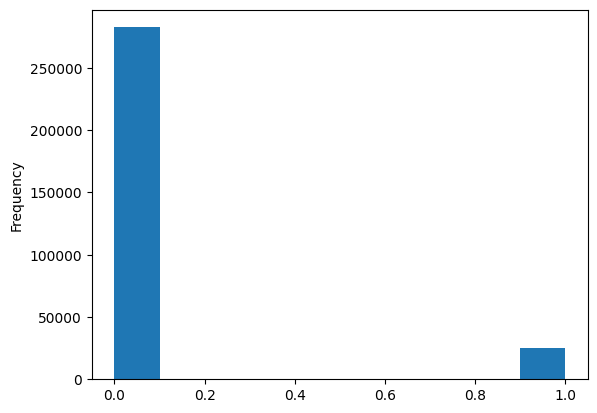

In [15]:
train['TARGET'].astype(int).plot.hist()

Data is very unbalanced, Bias data

In [16]:
def shape(dataframes, names):
    for df, name in zip(dataframes, names):
        shape = df.shape
        print(name, "shape:", shape)
shape(df_files, df_names)

train shape: (307511, 122)
bureau_balance shape: (14409059, 3)
credit_card_balance shape: (1789053, 23)
installments_payments shape: (3669392, 8)
bureau shape: (1716428, 17)
pos_cash shape: (4991063, 8)
previeus_application shape: (806853, 37)


# Valeurs Manquantes

In [17]:
# percentage null values
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [18]:
# df_files = [train, test, bureau_balance, credit_card_balance, description, installments_payments, bureau, pos_cash, previeus_application, sample_submission]
findMiss(train)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [19]:
# def findMiss(dataframes, names):
#     result = []  # Create a list to store the results
#     for df, name in zip(dataframes, names):
#         missing_percentage = round(df.isnull().sum() / df.shape[0] * 100, 2)
#         result.append((name, missing_percentage))  # Store the result as a tuple (name, missing_percentage)
#     return result  # Return the list of results

# missing_info = findMiss(df_files, df_names)

# # Print the results
# for name, percentage in missing_info:
#     print("DataFrame name:", name)
#     print("Percentage of missing values:", percentage, "%")


In [20]:
findMiss(bureau_balance)

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [21]:
findMiss(credit_card_balance)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
MONTHS_BALANCE                 0.00
AMT_BALANCE                    0.00
AMT_CREDIT_LIMIT_ACTUAL        0.00
AMT_DRAWINGS_ATM_CURRENT      20.32
AMT_DRAWINGS_CURRENT           0.00
AMT_DRAWINGS_OTHER_CURRENT    20.32
AMT_DRAWINGS_POS_CURRENT      20.32
AMT_INST_MIN_REGULARITY        7.38
AMT_PAYMENT_CURRENT           20.64
AMT_PAYMENT_TOTAL_CURRENT      0.00
AMT_RECEIVABLE_PRINCIPAL       0.00
AMT_RECIVABLE                  0.00
AMT_TOTAL_RECEIVABLE           0.00
CNT_DRAWINGS_ATM_CURRENT      20.32
CNT_DRAWINGS_CURRENT           0.00
CNT_DRAWINGS_OTHER_CURRENT    20.32
CNT_DRAWINGS_POS_CURRENT      20.32
CNT_INSTALMENT_MATURE_CUM      7.38
NAME_CONTRACT_STATUS           0.00
SK_DPD                         0.00
SK_DPD_DEF                     0.00
dtype: float64

In [22]:
findMiss(installments_payments)

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NUM_INSTALMENT_VERSION    0.0
NUM_INSTALMENT_NUMBER     0.0
DAYS_INSTALMENT           0.0
DAYS_ENTRY_PAYMENT        0.0
AMT_INSTALMENT            0.0
AMT_PAYMENT               0.0
dtype: float64

In [23]:
findMiss(bureau)

SK_ID_CURR                 0.00
SK_ID_BUREAU               0.00
CREDIT_ACTIVE              0.00
CREDIT_CURRENCY            0.00
DAYS_CREDIT                0.00
CREDIT_DAY_OVERDUE         0.00
DAYS_CREDIT_ENDDATE        6.15
DAYS_ENDDATE_FACT         36.92
AMT_CREDIT_MAX_OVERDUE    65.51
CNT_CREDIT_PROLONG         0.00
AMT_CREDIT_SUM             0.00
AMT_CREDIT_SUM_DEBT       15.01
AMT_CREDIT_SUM_LIMIT      34.48
AMT_CREDIT_SUM_OVERDUE     0.00
CREDIT_TYPE                0.00
DAYS_CREDIT_UPDATE         0.00
AMT_ANNUITY               71.47
dtype: float64

In [24]:
findMiss(installments_payments)

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NUM_INSTALMENT_VERSION    0.0
NUM_INSTALMENT_NUMBER     0.0
DAYS_INSTALMENT           0.0
DAYS_ENTRY_PAYMENT        0.0
AMT_INSTALMENT            0.0
AMT_PAYMENT               0.0
dtype: float64

In [25]:
findMiss(bureau)

SK_ID_CURR                 0.00
SK_ID_BUREAU               0.00
CREDIT_ACTIVE              0.00
CREDIT_CURRENCY            0.00
DAYS_CREDIT                0.00
CREDIT_DAY_OVERDUE         0.00
DAYS_CREDIT_ENDDATE        6.15
DAYS_ENDDATE_FACT         36.92
AMT_CREDIT_MAX_OVERDUE    65.51
CNT_CREDIT_PROLONG         0.00
AMT_CREDIT_SUM             0.00
AMT_CREDIT_SUM_DEBT       15.01
AMT_CREDIT_SUM_LIMIT      34.48
AMT_CREDIT_SUM_OVERDUE     0.00
CREDIT_TYPE                0.00
DAYS_CREDIT_UPDATE         0.00
AMT_ANNUITY               71.47
dtype: float64

In [26]:
findMiss(pos_cash)

SK_ID_PREV               0.00
SK_ID_CURR               0.00
MONTHS_BALANCE           0.00
CNT_INSTALMENT           0.15
CNT_INSTALMENT_FUTURE    0.15
NAME_CONTRACT_STATUS     0.00
SK_DPD                   0.00
SK_DPD_DEF               0.00
dtype: float64

In [27]:
findMiss(previeus_application)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.10
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               52.95
AMT_GOODS_PRICE                22.83
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              52.95
RATE_INTEREST_PRIMARY          99.65
RATE_INTEREST_PRIVILEGED       99.65
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.07
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.10
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
DAYS_FIRST_DRAWING             39.95
DAYS_FIRST_DUE                 39.95
DAYS_LAST_DUE_1ST_VERSION      39.95
DAYS_LAST_DUE                  39.95
DAYS_TERMINATION               39.95
NFLAG_INSURED_ON_APPROVAL      39.95
dtype: float64

# Regardons la cible (Target):

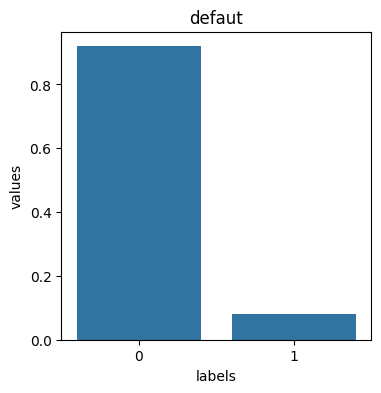

In [28]:
temp = train.TARGET.value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(train)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

D'après le graphique de distribution de la colonne TARGET, nous remarquons que nos données souffrent de classes déséquilibrées.

# Nettoyage des donnees

In [29]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [30]:
bureau[bureau['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
248485       100001       5896631        Closed      currency 1         -909   
248486       100001       5896632        Closed      currency 1         -879   
248490       100001       5896636        Active      currency 1         -320   
248489       100001       5896635        Active      currency 1          -49   
248487       100001       5896633        Closed      currency 1        -1572   
...             ...           ...           ...             ...          ...   
1010004      456255       5126328        Closed      currency 1         -970   
1010012      456255       5126336        Closed      currency 1        -2337   
1010011      456255       5126335        Closed      currency 1        -1512   
1010010      456255       5126334        Active      currency 1         -451   
1010008      456255       5126332        Active      currency 1         -378   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
248485                    0               -179.0             -877.0   
248486                    0               -514.0             -544.0   
248490                    0                411.0                NaN   
248489                    0               1778.0                NaN   
248487                    0              -1329.0            -1328.0   
...                     ...                  ...                ...   
1010004                   0               -621.0             -712.0   
1010012                   0               8620.0             -779.0   
1010011                   0                315.0             -781.0   
1010010                   0                279.0                NaN   
1010008                   0              27320.0                NaN   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
248485                      NaN                   0        279720.0   
248486                      NaN                   0         91620.0   
248490                      NaN                   0        168345.0   
248489                      NaN                   0        378000.0   
248487                      NaN                   0         85500.0   
...                         ...                 ...             ...   
1010004                     NaN                   0         27472.5   
1010012                2646.000                   1         38925.0   
1010011               25578.000                   0        900000.0   
1010010               15439.905                   0        450000.0   
1010008                     NaN                   0         90000.0   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
248485                  0.00                   0.0                     0.0   
248486                  0.00                   0.0                     0.0   
248490             110281.50                   NaN                     0.0   
248489             373239.00                   0.0                     0.0   
248487                  0.00                   0.0                     0.0   
...                      ...                   ...                     ...   
1010004                 0.00                   0.0                     0.0   
1010012                  NaN                   NaN                     0.0   
1010011                  NaN                   NaN                     0.0   
1010010            191005.47                   0.0                     0.0   
1010008             61060.50                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
248485   Consumer credit                -155          0.0  
248486   Consumer credit                -155          0.0  
248490   Consumer credit                 -10       9364.5  
248489   Consumer credit                 -16      10822.5  
248487   Consumer credit                -155          0.0  
...                  ...                 ... 

In [31]:
print(train.shape)
print(bureau.shape)

(307511, 122)
(1716428, 17)


Nettoyage de bureaubalance

In [32]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    # categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [33]:
# One-Hot Encoder
bb, bb_cat = one_hot_encoder(bureau_balance, nan_as_category=False)

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

for col in bb_cat:
    bb_aggregations[col] = ['mean']

bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

# Status Sum
bb_agg["STATUS_C0_MEAN_SUM"] = bb_agg[["STATUS_C_MEAN", "STATUS_0_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN"]].sum(axis = 1)
bb_agg["STATUS_345_MEAN_SUM"] = bb_agg[["STATUS_3_MEAN", "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12345_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN", "STATUS_3_MEAN",
                                          "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)

# Find the first month when the credit is closed!
closed = bureau_balance[bureau_balance.STATUS == "C"]
closed = closed.groupby("SK_ID_BUREAU").MONTHS_BALANCE.min().reset_index().rename({"MONTHS_BALANCE":"MONTHS_BALANCE_FIRST_C"}, axis = 1)
closed["MONTHS_BALANCE_FIRST_C"] = np.abs(closed["MONTHS_BALANCE_FIRST_C"])
bb_agg = pd.merge(bb_agg, closed, how = "left", on = "SK_ID_BUREAU")
bb_agg["MONTHS_BALANCE_CLOSED_DIF"] = np.abs(bb_agg.MONTHS_BALANCE_MIN) - bb_agg.MONTHS_BALANCE_FIRST_C

del closed, bb_aggregations, bureau_balance, bb_cat

In [34]:
print("BUREAU BALANCE SHAPE:", bb_agg.shape, "\n")

BUREAU BALANCE SHAPE: (434863, 18) 



In [35]:
bb_agg.head()

SK_ID_BUREAU  MONTHS_BALANCE_MIN  MONTHS_BALANCE_MAX  MONTHS_BALANCE_SIZE  \
0       5001710                 -82                   0                   83   
1       5001711                  -3                   0                    4   
2       5001712                 -18                   0                   19   
3       5001713                 -21                   0                   22   
4       5001714                 -14                   0                   15   

   STATUS_0_MEAN  STATUS_1_MEAN  STATUS_2_MEAN  STATUS_3_MEAN  STATUS_4_MEAN  \
0       0.060241            0.0            0.0            0.0            0.0   
1       0.750000            0.0            0.0            0.0            0.0   
2       0.526316            0.0            0.0            0.0            0.0   
3       0.000000            0.0            0.0            0.0            0.0   
4       0.000000            0.0            0.0            0.0            0.0   

   STATUS_5_MEAN  STATUS_C_MEAN  STATUS_X_MEAN  STATUS_C0_MEAN_SUM  \
0            0.0       0.578313       0.361446            0.638554   
1            0.0       0.000000       0.250000            0.750000   
2            0.0       0.473684       0.000000            1.000000   
3            0.0       0.000000       1.000000            0.000000   
4            0.0       0.000000       1.000000            0.000000   

   STATUS_12_MEAN_SUM  STATUS_345_MEAN_SUM  STATUS_12345_MEAN_SUM  \
0                 0.0                  0.0                    0.0   
1                 0.0                  0.0                    0.0   
2                 0.0                  0.0                    0.0   
3                 0.0                  0.0                    0.0   
4                 0.0                  0.0                    0.0   

   MONTHS_BALANCE_FIRST_C  MONTHS_BALANCE_CLOSED_DIF  
0                    47.0                       35.0  
1                     NaN                        NaN  
2                     8.0                       10.0  
3                     NaN                        NaN  
4                     NaN                        NaN

In [36]:
pd.set_option('display.max_columns', 500)

Merge Bureau Balance and Bureau

In [37]:
# LEFT JOIN WITH BUREAU
bureau = pd.merge(bureau, bb_agg, how='left', on='SK_ID_BUREAU')
# del bb_agg

print(bureau.shape, "\n")

bureau.head()

(1716428, 34) 



SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MIN  \
0  Consumer credit                -131          NaN                 NaN   
1      Credit card                 -20          NaN                 NaN   
2  Consumer credit                 -16          NaN                 NaN   
3      Credit card                 -16          NaN                 NaN   
4  Consumer credit                 -21          NaN                 NaN   

   MONTHS_BALANCE_MAX  MONTHS_BALANCE_SIZE  STATUS_0_MEAN  STATUS_1_MEAN  \
0                 NaN                  NaN            NaN            NaN   
1                 NaN                  NaN            NaN            NaN   
2                 NaN                  NaN            NaN            NaN   
3                 NaN                  NaN            NaN            NaN   
4                 NaN                  NaN            NaN            NaN   

   STATUS_2_MEAN  STATUS_3_MEAN  STATUS_4_MEAN  STATUS_5_MEAN  STATUS_C_MEAN  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   STATUS_X_MEAN  STATUS_C0_MEAN_SUM  STATUS_12_MEAN_SUM  STATUS_345_MEAN_SUM  \
0            NaN                 NaN                 NaN                  NaN   
1            NaN                 NaN                 NaN                  NaN   
2            NaN                 NaN                 NaN                  NaN   
3            NaN                 NaN                 NaN                  NaN   
4            NaN                 NaN                 NaN                  NaN   

   STATUS_12345_MEAN_SUM  MONTHS_BALANCE_FIRST_C  MONTHS_BALANCE_CLOSED_DIF  
0                    NaN                     NaN                        NaN  
1                    NaN                     NaN                        NaN  
2                    NaN                     NaN                        NaN  
3                    NaN                     NaN                        NaN  
4                    NaN                     NaN                        NaN

In [38]:
bureau.CREDIT_ACTIVE

0          Closed
1          Active
2          Active
3          Active
4          Active
            ...  
1716423    Active
1716424    Closed
1716425    Closed
1716426    Closed
1716427    Closed
Name: CREDIT_ACTIVE, Length: 1716428, dtype: object

Le taux de valeurs manquantes en % de bureau

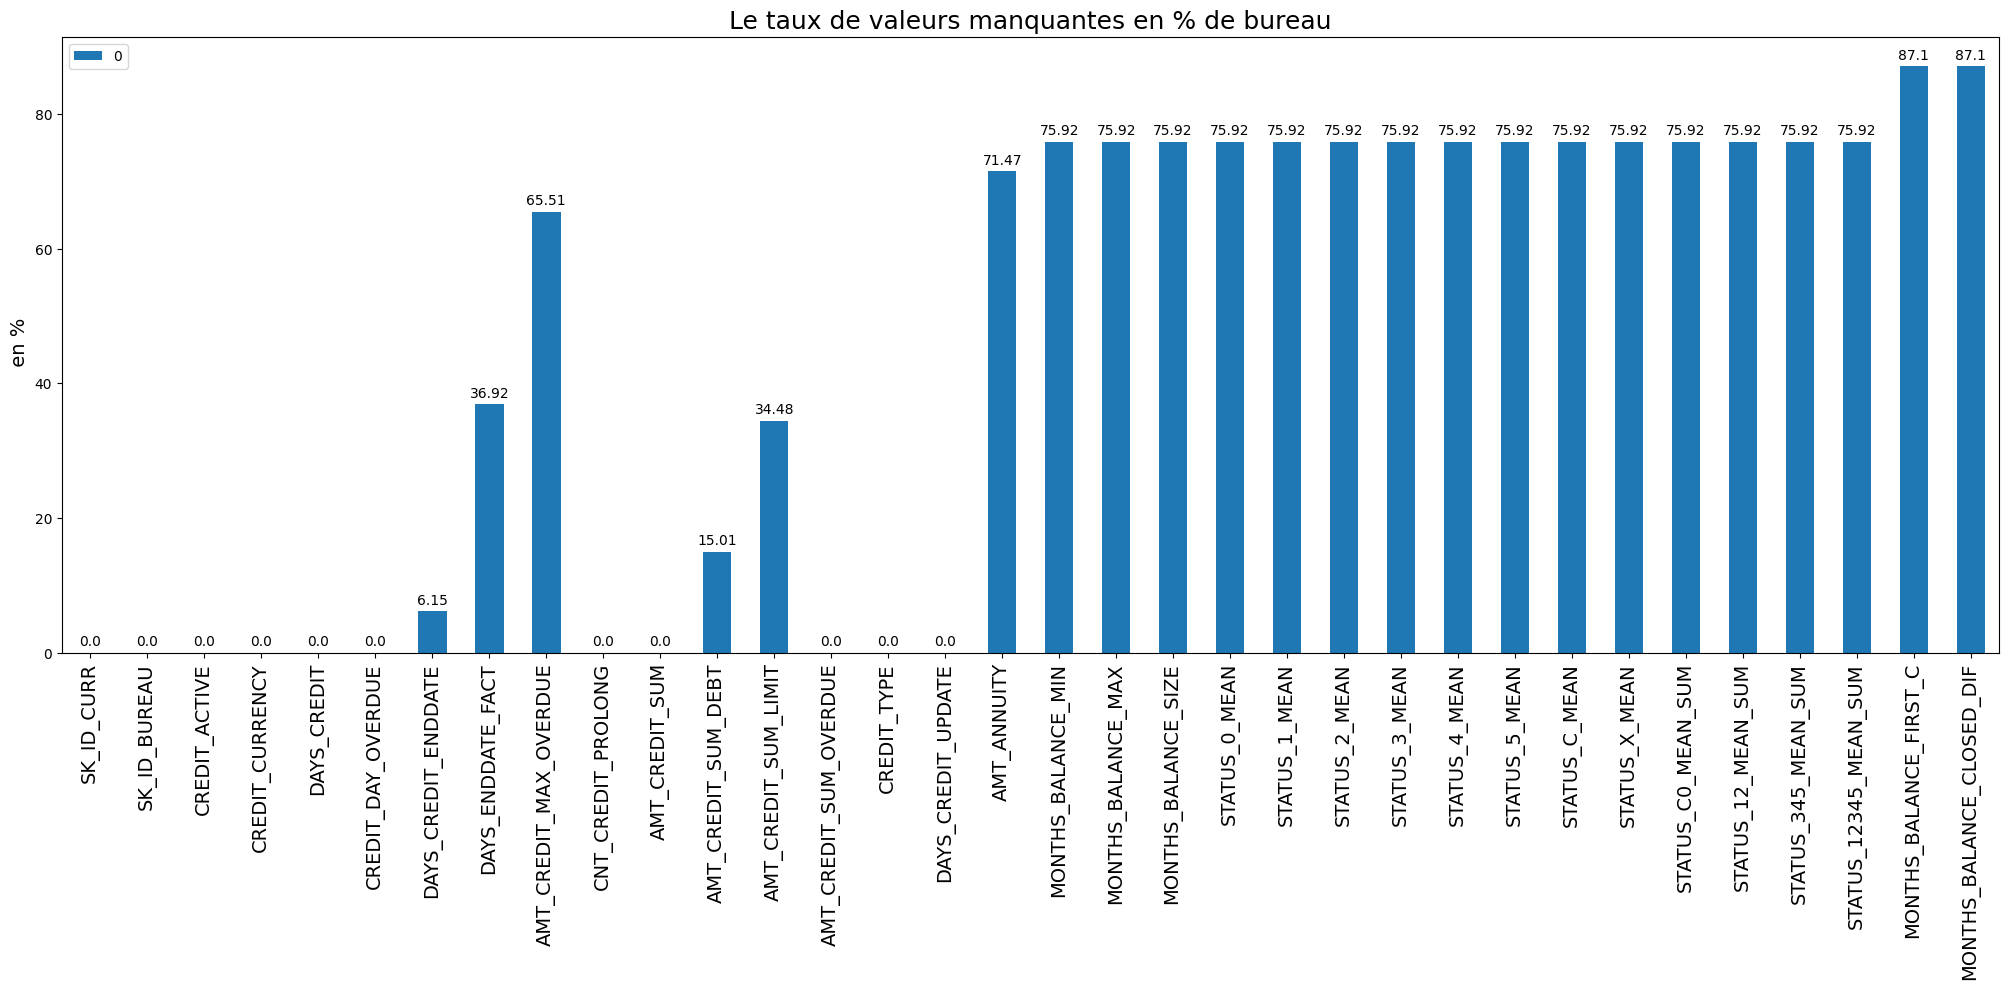

In [39]:
missing_rate = (bureau.isna().sum()/bureau.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de bureau",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )


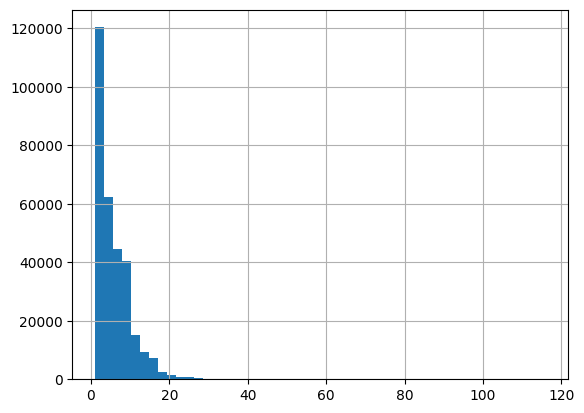

min         1.000000
median      4.000000
max       116.000000
mean        5.612709
std         4.430354
Name: SK_ID_BUREAU, dtype: float64

In [40]:
# Combien de prêts de chaque client y a-t-il auprès du bureau de crédit ?
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().hist(bins=50), plt.show()
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().agg({"min", "max", "mean", "median", "std"})

Manipulation de données de bureau

In [41]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'MONTHS_BALANCE_MIN', 'MONTHS_BALANCE_MAX',
       'MONTHS_BALANCE_SIZE', 'STATUS_0_MEAN', 'STATUS_1_MEAN',
       'STATUS_2_MEAN', 'STATUS_3_MEAN', 'STATUS_4_MEAN', 'STATUS_5_MEAN',
       'STATUS_C_MEAN', 'STATUS_X_MEAN', 'STATUS_C0_MEAN_SUM',
       'STATUS_12_MEAN_SUM', 'STATUS_345_MEAN_SUM', 'STATUS_12345_MEAN_SUM',
       'MONTHS_BALANCE_FIRST_C', 'MONTHS_BALANCE_CLOSED_DIF'],
      dtype='object')

test

In [42]:
# FEATURE ENGINEERING FOR BUREAU

# Categorical Variables
# -----------------------------------------------------------
# Useless
# bureau.drop("CREDIT_CURRENCY", axis = 1, inplace = True)

# Rare Categories
bureau["CREDIT_ACTIVE"] = np.where(bureau.CREDIT_ACTIVE.isin(["Sold", "Bad debt"]), "Sold_BadDebt", bureau.CREDIT_ACTIVE)

bureau["CREDIT_TYPE"] = np.where(
    ~bureau.CREDIT_TYPE.isin(
        ["Consumer credit", "Credit card", "Car loan", "Mortgage", "Microloan"]
    ), "Other", bureau["CREDIT_TYPE"])

# One-Hot Encoder
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=False)


# Numerical Variables
# -----------------------------------------------------------

# Bureau and bureau_balance numeric features
# cal = ['min', 'max', 'mean', 'sum', 'median','std']
cal = ['mean']
cols1 = [
    'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE','CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
    'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY', 'CNT_CREDIT_PROLONG', 'MONTHS_BALANCE_MIN',
    'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE', 'MONTHS_BALANCE_FIRST_C', 'MONTHS_BALANCE_CLOSED_DIF'
]

num_aggregations = {}


for i in cols1:
    num_aggregations[i] = cal


# Bureau and bureau_balance categorical features
cat_aggregations = {}

for i in bureau_cat:
    cat_aggregations[i] = ['mean']

cols2 = ['STATUS_0_MEAN', 'STATUS_1_MEAN', 'STATUS_2_MEAN', 'STATUS_3_MEAN', 'STATUS_4_MEAN',
        'STATUS_5_MEAN', 'STATUS_C_MEAN', 'STATUS_X_MEAN', 'STATUS_C0_MEAN_SUM',
        'STATUS_12_MEAN_SUM', 'STATUS_345_MEAN_SUM', 'STATUS_12345_MEAN_SUM']
for i in cols2:
#     cat_aggregations[i] = ['mean', 'median', 'sum', 'max', 'std']
    cat_aggregations[i] = ['mean']

# del i, cols1, cols2, bureau_cat, cal

# Create aggregated data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BUREAU_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])


# New features
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().value_counts()
bcount = bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().reset_index().rename({"SK_ID_BUREAU":"BUREAU_COUNT"}, axis = 1)
bcount["BUREAU_COUNT_CAT"] = np.where(bcount.BUREAU_COUNT < 4, 0, 1)
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 8) & (bcount.BUREAU_COUNT < 13), 2, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 13) & (bcount.BUREAU_COUNT < 20), 3, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 20), 4, bcount["BUREAU_COUNT_CAT"])
bureau_agg = pd.merge(bureau_agg, bcount, how = "left", on = "SK_ID_CURR")
# del bcount


# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, active_agg, how='left', on='SK_ID_CURR')
# del active, active_agg


# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, closed_agg, how='left', on='SK_ID_CURR')
# del closed, closed_agg

# Bureau: Sold and Bad Debt credits - using only numerical aggregations
sold_baddebt = bureau[bureau['CREDIT_ACTIVE_Sold_BadDebt'] == 1]
sold_baddebt_agg = sold_baddebt.groupby('SK_ID_CURR').agg(num_aggregations)
sold_baddebt_agg.columns = pd.Index(['SOLD_BADDEBT' + e[0] + "_" + e[1].upper() for e in sold_baddebt_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, sold_baddebt_agg, how='left', on='SK_ID_CURR')
# del sold_baddebt, sold_baddebt_agg, bureau

# del num_aggregations, cat_aggregations

print("BUREAU & BURAU BALANCE SHAPE:", bureau_agg.shape, "\n")

bureau_agg.head()

BUREAU & BURAU BALANCE SHAPE: (305811, 92) 



SK_ID_CURR  BUREAU_DAYS_CREDIT_MEAN  BUREAU_DAYS_CREDIT_ENDDATE_MEAN  \
0      100001              -735.000000                        82.428571   
1      100002              -874.000000                      -349.000000   
2      100003             -1400.750000                      -544.500000   
3      100004              -867.000000                      -488.500000   
4      100005              -190.666667                       439.333333   

   BUREAU_DAYS_CREDIT_UPDATE_MEAN  BUREAU_CREDIT_DAY_OVERDUE_MEAN  \
0                      -93.142857                             0.0   
1                     -499.875000                             0.0   
2                     -816.000000                             0.0   
3                     -532.000000                             0.0   
4                      -54.333333                             0.0   

   BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN  BUREAU_AMT_CREDIT_SUM_MEAN  \
0                                 NaN               207623.571429   
1                            1681.029               108131.945625   
2                               0.000               254350.125000   
3                               0.000                94518.900000   
4                               0.000               219042.000000   

   BUREAU_AMT_CREDIT_SUM_DEBT_MEAN  BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN  \
0                     85240.928571                                 0.0   
1                     49156.200000                                 0.0   
2                         0.000000                                 0.0   
3                         0.000000                                 0.0   
4                    189469.500000                                 0.0   

   BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN  BUREAU_AMT_ANNUITY_MEAN  \
0                           0.00000              3545.357143   
1                        7997.14125                 0.000000   
2                      202500.00000                      NaN   
3                           0.00000                      NaN   
4                           0.00000              1420.500000   

   BUREAU_CNT_CREDIT_PROLONG_MEAN  BUREAU_MONTHS_BALANCE_MIN_MEAN  \
0                             0.0                      -23.571429   
1                             0.0                      -26.333333   
2                             0.0                             NaN   
3                             0.0                             NaN   
4                             0.0                             NaN   

   BUREAU_MONTHS_BALANCE_MAX_MEAN  BUREAU_MONTHS_BALANCE_SIZE_MEAN  \
0                        0.000000                        24.571429   
1                      -14.333333                        13.000000   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   

   BUREAU_MONTHS_BALANCE_FIRST_C_MEAN  BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN  \
0                               26.50                                   7.50   
1                               20.75                                  12.75   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 NaN                                    NaN   

   BUREAU_CREDIT_ACTIVE_Active_MEAN  BUREAU_CREDIT_ACTIVE_Closed_MEAN  \
0                          0.428571                          0.571429   
1                          0.250000                          0.750000   
2                          0.250000                          0.750000   
3                          0.000000                          1.000000   
4                          0.666667                          0.333333   

   BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN  \
0                                     0.0   
1                                     0.0   
2

Nettoyage de données de df_POS_CASH_balance

In [43]:
# Rare
pos_cash["NAME_CONTRACT_STATUS"] = np.where(~(pos_cash["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", pos_cash["NAME_CONTRACT_STATUS"])

# One-Hot Encoder
pos_cash, cat_cols = one_hot_encoder(pos_cash, nan_as_category=False)

aggregations = {
    # Numerical
#     'MONTHS_BALANCE': ['max', 'mean', 'size'],
#     'CNT_INSTALMENT': ['max', 'mean', 'std', 'min', 'median'],
#     'CNT_INSTALMENT_FUTURE': ['max', 'mean', 'sum', 'min', 'median', 'std'],
#     'SK_DPD': ['max', 'mean'],
#     'SK_DPD_DEF': ['max', 'mean']
    'MONTHS_BALANCE': ['mean', 'size'],
    'CNT_INSTALMENT': ['mean'],
    'CNT_INSTALMENT_FUTURE': ['mean'],
    'SK_DPD': ['mean'],
    'SK_DPD_DEF': ['mean']
}
# Categorical
for cat in cat_cols:
    aggregations[cat] = ['mean']

# Aggregation
pos_cash_agg = pos_cash.groupby('SK_ID_CURR').agg(aggregations)
pos_cash_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_cash_agg.columns.tolist()])
# Count df_POS_CASH_balance cash accounts
pos_cash_agg['df_POS_CASH_balance_COUNT'] = pos_cash.groupby('SK_ID_CURR').size()
pos_cash_agg.reset_index(inplace = True)
del pos_cash

print("df_POS_CASH_balance CASH BALANCE SHAPE:", pos_cash_agg.shape, "\n")

pos_cash_agg.head()

df_POS_CASH_balance CASH BALANCE SHAPE: (320381, 11) 



SK_ID_CURR  POS_MONTHS_BALANCE_MEAN  POS_MONTHS_BALANCE_SIZE  \
0      100001               -78.200000                        5   
1      100002               -15.666667                        3   
2      100003               -47.705882                       17   
3      100004               -24.500000                        2   
4      100005               -22.200000                        5   

   POS_CNT_INSTALMENT_MEAN  POS_CNT_INSTALMENT_FUTURE_MEAN  POS_SK_DPD_MEAN  \
0                 4.000000                        0.800000              1.4   
1                24.000000                       20.666667              0.0   
2                11.294118                        6.117647              0.0   
3                 3.500000                        1.000000              0.0   
4                12.000000                        9.500000              0.0   

   POS_SK_DPD_DEF_MEAN  POS_NAME_CONTRACT_STATUS_Active_MEAN  \
0                  1.4                                   0.6   
1                  0.0                                   1.0   
2                  0.0                                   1.0   
3                  0.0                                   0.5   
4                  0.0                                   0.8   

   POS_NAME_CONTRACT_STATUS_Completed_MEAN  \
0                                      0.4   
1                                      0.0   
2                                      0.0   
3                                      0.5   
4                                      0.0   

   POS_NAME_CONTRACT_STATUS_Rare_MEAN  df_POS_CASH_balance_COUNT  
0                                 0.0                          5  
1                                 0.0                          3  
2                                 0.0                         17  
3                                 0.0                          2  
4                                 0.2                          5

Credit Card Balance

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) liés aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon # de cartes de crédit précédentes relatives # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).

Le taux de valeurs manquantes en % df_credit_card_balance

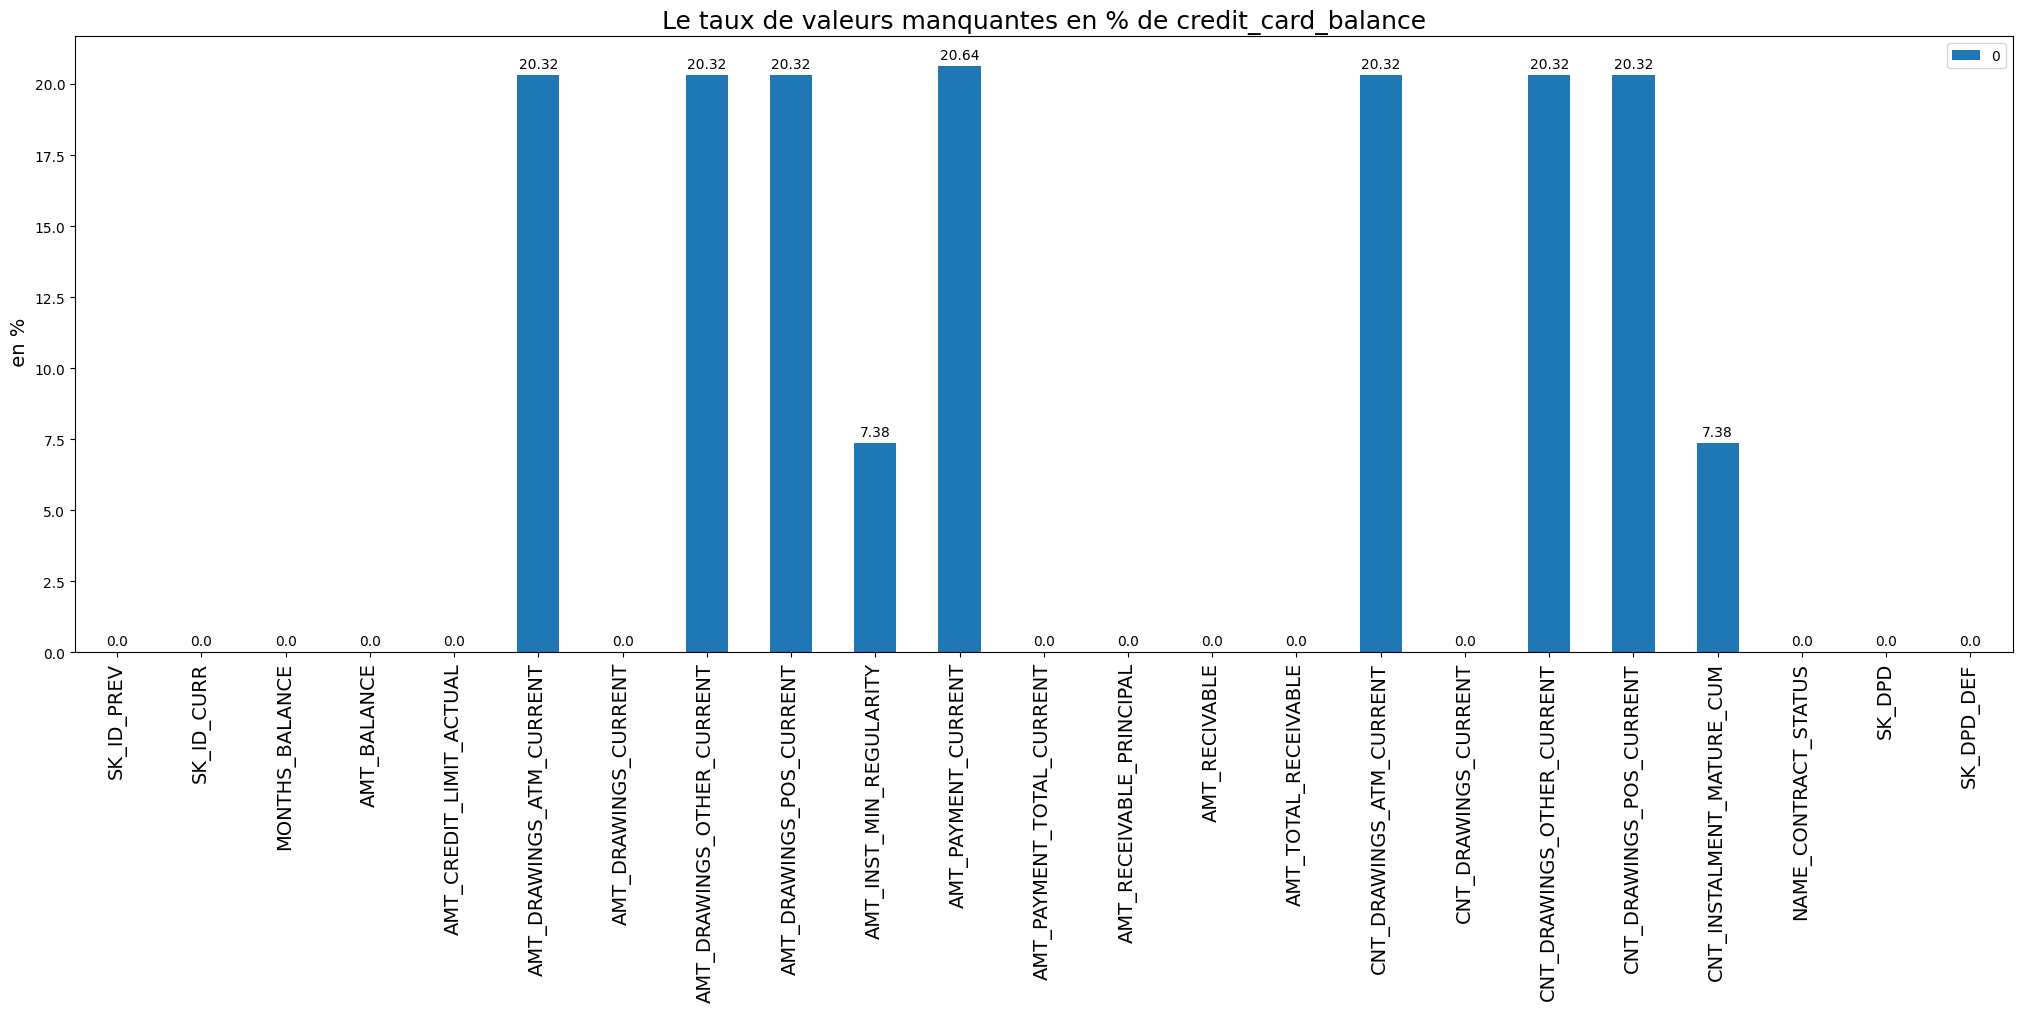

In [44]:
missing_rate = (credit_card_balance.isna().sum()/credit_card_balance.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de credit_card_balance",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données df_credit_card_balance

In [45]:
# Rare
credit_card_balance["NAME_CONTRACT_STATUS"] = np.where(~(credit_card_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", credit_card_balance["NAME_CONTRACT_STATUS"])

# One Hot Encoder
credit_card_balance, cat_cols = one_hot_encoder(credit_card_balance, nan_as_category=False)

# General aggregations
credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)
credit_card_balance_agg = credit_card_balance.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'std'])
credit_card_balance_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in credit_card_balance_agg.columns.tolist()])
# Count credit card lines
credit_card_balance_agg['df_credit_card_balance_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
credit_card_balance_agg.reset_index(inplace = True)
del credit_card_balance

print("CREDIT CARD BALANCE SHAPE:", credit_card_balance_agg.shape, "\n")

credit_card_balance_agg.head()

CREDIT CARD BALANCE SHAPE: (102395, 117) 



SK_ID_CURR  CC_MONTHS_BALANCE_MIN  CC_MONTHS_BALANCE_MAX  \
0      100006                     -6                     -1   
1      100011                    -72                     -4   
2      100013                    -94                     -2   
3      100021                    -16                     -2   
4      100023                     -9                     -4   

   CC_MONTHS_BALANCE_MEAN  CC_MONTHS_BALANCE_SUM  CC_MONTHS_BALANCE_STD  \
0               -3.500000                    -21               1.870829   
1              -39.620690                  -1149              20.800779   
2              -47.744186                  -2053              29.465955   
3               -8.000000                    -56               5.446712   
4               -7.000000                    -28               2.160247   

   CC_AMT_BALANCE_MIN  CC_AMT_BALANCE_MAX  CC_AMT_BALANCE_MEAN  \
0                 0.0                0.00             0.000000   
1                 0.0           177544.35         57586.936034   
2                 0.0           161420.22         28686.116512   
3                 0.0                0.00             0.000000   
4                 0.0                0.00             0.000000   

   CC_AMT_BALANCE_SUM  CC_AMT_BALANCE_STD  CC_AMT_CREDIT_LIMIT_ACTUAL_MIN  \
0               0.000            0.000000                          270000   
1         1670021.145        66007.585518                           90000   
2         1233503.010        50360.679225                           45000   
3               0.000            0.000000                          675000   
4               0.000            0.000000                           45000   

   CC_AMT_CREDIT_LIMIT_ACTUAL_MAX  CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN  \
0                          270000                    270000.000000   
1                          180000                    167586.206897   
2                          157500                    123488.372093   
3                          675000                    675000.000000   
4                          225000                    135000.000000   

   CC_AMT_CREDIT_LIMIT_ACTUAL_SUM  CC_AMT_CREDIT_LIMIT_ACTUAL_STD  \
0                         1620000                        0.000000   
1                         4860000                    31583.808285   
2                         5310000                    52278.841251   
3                         4725000                        0.000000   
4                          540000                   103923.048454   

   CC_AMT_DRAWINGS_ATM_CURRENT_MIN  CC_AMT_DRAWINGS_ATM_CURRENT_MAX  \
0                              NaN                              NaN   
1                              0.0                              0.0   
2                              0.0                         157500.0   
3                              NaN                              NaN   
4                              NaN                              NaN   

   CC_AMT_DRAWINGS_ATM_CURRENT_MEAN  CC_AMT_DRAWINGS_ATM_CURRENT_SUM  \
0                               NaN                              0.0   
1                          0.000000                              0.0   
2                      10207.317073                         418500.0   
3                               NaN                              0.0   
4                               NaN                              0.0   

   CC_AMT_DRAWINGS_ATM_CURRENT_STD  CC_AMT_DRAWINGS_CURRENT_MIN  \
0                              NaN                          0.0   
1                         0.000000                          0.0   
2                     37162.813337                          0.0   
3                              NaN                          0.0   
4                              NaN                          0.0   

   CC_AMT_DRAWINGS_CURRENT_MAX  CC_AMT_DRAWINGS_CURRENT_MEAN  \
0                          0.0                       0.00000   
1                          0.0                       0.00000   
2                     

**Installments Payments**

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a :

une ligne pour chaque paiement effectué plus
une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance ou une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

Le taux de valeurs manquantes en % df_credit_card_balance

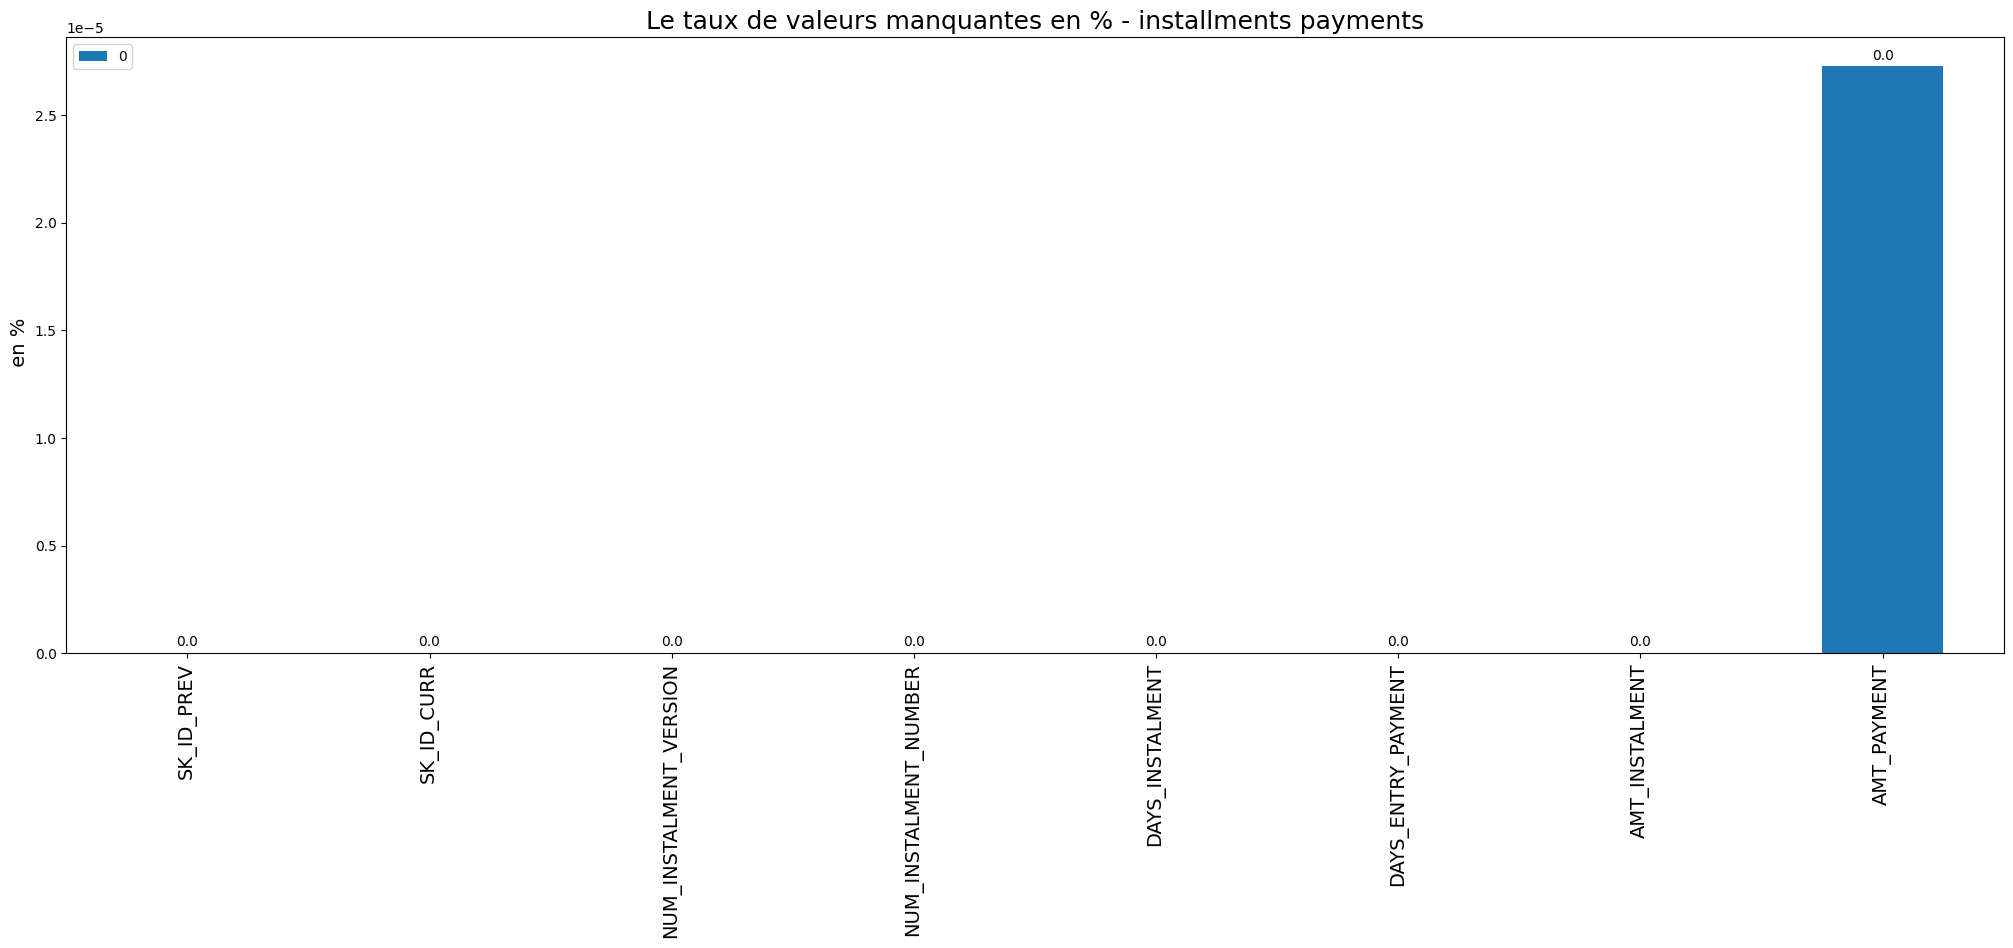

In [46]:
missing_rate = (installments_payments.isna().sum()/installments_payments.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [47]:
installments_payments['AMT_PAYMENT'].dtype

dtype('float64')

In [48]:
installments_payments['DAYS_INSTALMENT'].dtype

dtype('float64')

In [49]:
installments_payments['DAYS_INSTALMENT'] = pd.to_numeric(installments_payments['DAYS_INSTALMENT'], errors='coerce')

In [50]:
# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['PAYMENT_PERC'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']
# Days past due and days before due (no negative values)
installments_payments['DPD'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['DBD'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['DPD'] = installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
installments_payments['DBD'] = installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['mean'],
    'DAYS_INSTALMENT': ['mean'],
    'DAYS_ENTRY_PAYMENT': ['mean'],
    'AMT_INSTALMENT': ['mean'],
    'AMT_PAYMENT': ['mean'],
    'DPD': ['mean'],
    'DBD': ['mean'],
    'PAYMENT_PERC': ['mean'],
    'PAYMENT_DIFF': ['mean']
}

installments_payments_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
installments_payments_agg.columns = pd.Index(['INS_' + e[0] + "_" + e[1].upper() for e in installments_payments_agg.columns.tolist()])
# Count installments accounts
installments_payments_agg['INS_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()

installments_payments_agg.reset_index(inplace = True)
del installments_payments



print("INSTALLMENTS PAYMENTS SHAPE:", installments_payments_agg.shape, "\n")

installments_payments_agg.head()

INSTALLMENTS PAYMENTS SHAPE: (95333, 12) 



SK_ID_CURR  INS_NUM_INSTALMENT_VERSION_NUNIQUE  \
0      100001                                   2   
1      100002                                   2   
2      100003                                   2   
3      100004                                   2   
4      100005                                   2   

   INS_NUM_INSTALMENT_NUMBER_MEAN  INS_DAYS_INSTALMENT_MEAN  \
0                        2.666667              -2071.333333   
1                       10.000000               -295.000000   
2                        5.080000              -1378.160000   
3                        2.000000               -754.000000   
4                        5.000000               -586.000000   

   INS_DAYS_ENTRY_PAYMENT_MEAN  INS_AMT_INSTALMENT_MEAN  INS_AMT_PAYMENT_MEAN  \
0                 -2081.666667              6202.312500           6202.312500   
1                  -315.421053             11559.247105          11559.247105   
2                 -1385.320000             64754.586000          64754.586000   
3                  -761.666667              7096.155000           7096.155000   
4                  -609.555556              6240.205000           6240.205000   

   INS_DPD_MEAN  INS_DBD_MEAN  INS_PAYMENT_PERC_MEAN  INS_PAYMENT_DIFF_MEAN  \
0      0.000000     10.333333                    1.0                    0.0   
1      0.000000     20.421053                    1.0                    0.0   
2      0.000000      7.160000                    1.0                    0.0   
3      0.000000      7.666667                    1.0                    0.0   
4      0.111111     23.666667                    1.0                    0.0   

   INS_COUNT  
0          6  
1         19  
2         25  
3          3  
4          9

**Previous Applications**

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

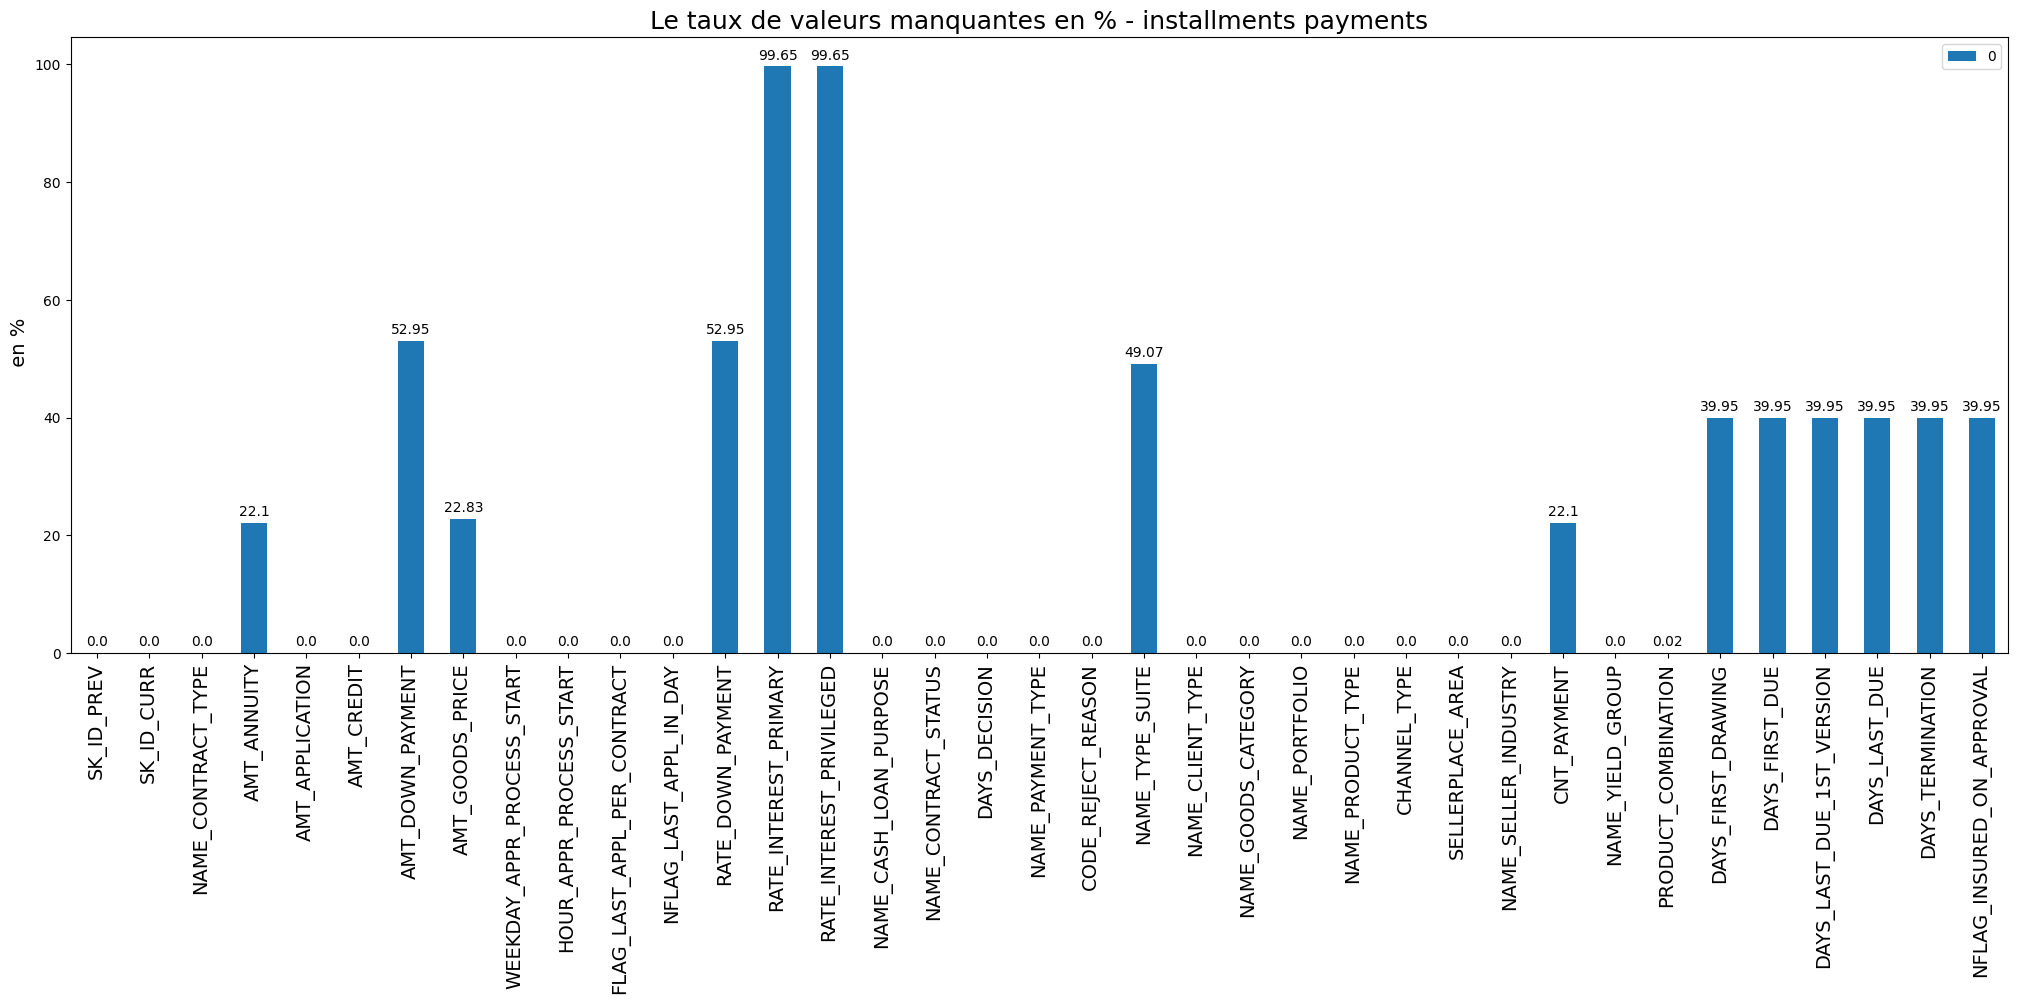

In [51]:
missing_rate = (previeus_application.isna().sum()/previeus_application.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données de df_previous_application

In [52]:
# Rare Encoder
def rare_encoder(data, col, rare_perc):
    temp = data[col].value_counts() / len(data) < rare_perc
    data[col] = np.where(~data[col].isin(temp[temp < rare_perc].index), "Rare", data[col])

In [53]:
# Rare Encoder
rare_cols = [
    "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "CHANNEL_TYPE", "NAME_GOODS_CATEGORY",
    "NAME_SELLER_INDUSTRY", "NAME_TYPE_SUITE"
]

for i in rare_cols:
    rare_encoder(previeus_application, i, rare_perc = 0.01)

previeus_application["NAME_CASH_LOAN_PURPOSE"] = np.where(~previeus_application["NAME_CASH_LOAN_PURPOSE"].isin(["XAP", "XNA"]), "Other", previeus_application["NAME_CASH_LOAN_PURPOSE"])

rare_encoder(previeus_application, "NAME_PORTFOLIO", rare_perc = 0.1)

# Cash, Pos, Card
previeus_application["PRODUCT_COMBINATION_CATS"] = np.where(previeus_application["PRODUCT_COMBINATION"].str.contains("Cash"), "CASH", "POS")
previeus_application["PRODUCT_COMBINATION_CATS"] = np.where(previeus_application["PRODUCT_COMBINATION"].str.contains("Card"), "CARD", previeus_application["PRODUCT_COMBINATION_CATS"])
# New categorical variables
previeus_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("POS") & (previeus_application["PRODUCT_COMBINATION"].str.contains("without"))), "WITHOUT", "OTHER")
previeus_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("POS") & (previeus_application["PRODUCT_COMBINATION"].str.contains("with interest"))), "WITH", previeus_application["PRODUCT_COMBINATION_POS_WITH"])
previeus_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("POS") & (previeus_application["PRODUCT_COMBINATION"].str.contains("household"))), "household", "OTHER")
previeus_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("POS") & (previeus_application["PRODUCT_COMBINATION"].str.contains("industry"))), "industry", previeus_application["PRODUCT_COMBINATION_POS_TYPE"])
previeus_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("POS") & (previeus_application["PRODUCT_COMBINATION"].str.contains("mobile"))), "mobile", previeus_application["PRODUCT_COMBINATION_POS_TYPE"])
previeus_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("POS") & (previeus_application["PRODUCT_COMBINATION"].str.contains("other"))), "posother", previeus_application["PRODUCT_COMBINATION_POS_TYPE"])
previeus_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("Cash") & (previeus_application["PRODUCT_COMBINATION"].str.contains("X-Sell"))), "xsell", "OTHER")
previeus_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((previeus_application["PRODUCT_COMBINATION"].str.contains("Cash") & (previeus_application["PRODUCT_COMBINATION"].str.contains("Street"))), "street", previeus_application["PRODUCT_COMBINATION_CASH_TYPE"])

# previeus_application = previeus_application.drop(["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "NFLAG_LAST_APPL_IN_DAY"], axis=1, inplace = True)

# Useless
previeus_application.drop(["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "NFLAG_LAST_APPL_IN_DAY"], axis = 1, inplace = True)

# One-Hot Encoder
previeus_application, cat_cols = one_hot_encoder(previeus_application, nan_as_category=True)


# Days 365.243 values -> nan
previeus_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
previeus_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
previeus_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
previeus_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
previeus_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

# Add feature: value ask / value received percentage
previeus_application['APP_CREDIT_PERC'] = previeus_application['AMT_APPLICATION'] / previeus_application['AMT_CREDIT']

num_aggregations = {

    'AMT_ANNUITY': ['mean'],
    'AMT_APPLICATION': ['mean'],
    'AMT_CREDIT': ['mean'],
    'APP_CREDIT_PERC': ['mean'],
    'AMT_DOWN_PAYMENT': ['mean'],
    'AMT_GOODS_PRICE': ['mean'],
    'HOUR_APPR_PROCESS_START': ['mean'],
    'RATE_DOWN_PAYMENT': ['mean'],
    'RATE_INTEREST_PRIMARY': ['mean'],
    'RATE_INTEREST_PRIVILEGED': ['mean'],
    'DAYS_DECISION': ['mean'],
    'CNT_PAYMENT': ['mean'],
    'SELLERPLACE_AREA': ['mean'],
    'DAYS_FIRST_DRAWING': ['mean'],
    'DAYS_FIRST_DUE': ['mean'],
    'DAYS_LAST_DUE_1ST_VERSION': ['mean'],
    'DAYS_LAST_DUE': ['mean'],
    'DAYS_TERMINATION': ['mean'],
    # Categorical
    "NFLAG_INSURED_ON_APPROVAL": ["mean"]
    }
# Previous Applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

previeus_application_agg = previeus_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
previeus_application_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in previeus_application_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = previeus_application[previeus_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
previeus_application_agg = pd.merge(previeus_application_agg,approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = previeus_application[previeus_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
previeus_application_agg = pd.merge(previeus_application_agg, refused_agg, how='left', on='SK_ID_CURR')

del refused, refused_agg, approved, approved_agg
previeus_application_agg.reset_index(inplace = True)


print("PREVIOUS APPLICATIONS SHAPE:", previeus_application_agg.shape, "\n")

previeus_application_agg.head()

PREVIOUS APPLICATIONS SHAPE: (282992, 174) 



SK_ID_CURR  PREV_AMT_ANNUITY_MEAN  PREV_AMT_APPLICATION_MEAN  \
0      100001               3951.000                    24835.5   
1      100003              98356.995                   900000.0   
2      100006              24246.000                   337500.0   
3      100007              15186.075                   217500.0   
4      100008              17071.500                   164263.5   

   PREV_AMT_CREDIT_MEAN  PREV_APP_CREDIT_PERC_MEAN  \
0              23787.00                   1.044079   
1            1035882.00                   0.868825   
2             337500.00                   1.000000   
3             246229.50                   0.897825   
4             176132.25                   1.003028   

   PREV_AMT_DOWN_PAYMENT_MEAN  PREV_AMT_GOODS_PRICE_MEAN  \
0                      2520.0                    24835.5   
1                         NaN                   900000.0   
2                         NaN                   675000.0   
3                         NaN                   217500.0   
4                      2250.0                   219018.0   

   PREV_HOUR_APPR_PROCESS_START_MEAN  PREV_RATE_DOWN_PAYMENT_MEAN  \
0                          13.000000                     0.104326   
1                          12.000000                          NaN   
2                          15.000000                          NaN   
3                          12.666667                          NaN   
4                          12.750000                     0.055122   

   PREV_RATE_INTEREST_PRIMARY_MEAN  PREV_RATE_INTEREST_PRIVILEGED_MEAN  \
0                              NaN                                 NaN   
1                              NaN                                 NaN   
2                              NaN                                 NaN   
3                              NaN                                 NaN   
4                              NaN                                 NaN   

   PREV_DAYS_DECISION_MEAN  PREV_CNT_PAYMENT_MEAN  PREV_SELLERPLACE_AREA_MEAN  \
0                 -1740.00               8.000000                       23.00   
1                  -746.00              12.000000                       -1.00   
2                  -181.00              48.000000                       -1.00   
3                  -702.00              30.000000                      401.00   
4                  -906.75              15.333333                       67.25   

   PREV_DAYS_FIRST_DRAWING_MEAN  PREV_DAYS_FIRST_DUE_MEAN  \
0                           NaN              -1709.000000   
1                           NaN               -716.000000   
2                           NaN               -151.000000   
3                           NaN               -589.000000   
4                           NaN              -1146.333333   

   PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN  PREV_DAYS_LAST_DUE_MEAN  \
0                         -1499.000000             -1619.000000   
1                          -386.000000              -536.000000   
2                          1259.000000              -151.000000   
3                            11.000000              -354.000000   
4                          -716.333333              -936.333333   

   PREV_DAYS_TERMINATION_MEAN  PREV_NFLAG_INSURED_ON_APPROVAL_MEAN  \
0                -1612.000000                             0.000000   
1                 -527.000000                             1.000000   
2                 -143.000000                             0.000000   
3                 -347.000000                             0.500000   
4                 -929.333333                             0.333333   

   PREV_NAME_CONTRACT_TYPE_Cash loans_MEAN  \
0                                      0.0   
1                                      1.0   
2                                      0.5   
3                                      1.0   
4                                      0.5   

   PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN  \
0                                          1.0   

In [54]:
previeus_application_agg.head()

SK_ID_CURR  PREV_AMT_ANNUITY_MEAN  PREV_AMT_APPLICATION_MEAN  \
0      100001               3951.000                    24835.5   
1      100003              98356.995                   900000.0   
2      100006              24246.000                   337500.0   
3      100007              15186.075                   217500.0   
4      100008              17071.500                   164263.5   

   PREV_AMT_CREDIT_MEAN  PREV_APP_CREDIT_PERC_MEAN  \
0              23787.00                   1.044079   
1            1035882.00                   0.868825   
2             337500.00                   1.000000   
3             246229.50                   0.897825   
4             176132.25                   1.003028   

   PREV_AMT_DOWN_PAYMENT_MEAN  PREV_AMT_GOODS_PRICE_MEAN  \
0                      2520.0                    24835.5   
1                         NaN                   900000.0   
2                         NaN                   675000.0   
3                         NaN                   217500.0   
4                      2250.0                   219018.0   

   PREV_HOUR_APPR_PROCESS_START_MEAN  PREV_RATE_DOWN_PAYMENT_MEAN  \
0                          13.000000                     0.104326   
1                          12.000000                          NaN   
2                          15.000000                          NaN   
3                          12.666667                          NaN   
4                          12.750000                     0.055122   

   PREV_RATE_INTEREST_PRIMARY_MEAN  PREV_RATE_INTEREST_PRIVILEGED_MEAN  \
0                              NaN                                 NaN   
1                              NaN                                 NaN   
2                              NaN                                 NaN   
3                              NaN                                 NaN   
4                              NaN                                 NaN   

   PREV_DAYS_DECISION_MEAN  PREV_CNT_PAYMENT_MEAN  PREV_SELLERPLACE_AREA_MEAN  \
0                 -1740.00               8.000000                       23.00   
1                  -746.00              12.000000                       -1.00   
2                  -181.00              48.000000                       -1.00   
3                  -702.00              30.000000                      401.00   
4                  -906.75              15.333333                       67.25   

   PREV_DAYS_FIRST_DRAWING_MEAN  PREV_DAYS_FIRST_DUE_MEAN  \
0                           NaN              -1709.000000   
1                           NaN               -716.000000   
2                           NaN               -151.000000   
3                           NaN               -589.000000   
4                           NaN              -1146.333333   

   PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN  PREV_DAYS_LAST_DUE_MEAN  \
0                         -1499.000000             -1619.000000   
1                          -386.000000              -536.000000   
2                          1259.000000              -151.000000   
3                            11.000000              -354.000000   
4                          -716.333333              -936.333333   

   PREV_DAYS_TERMINATION_MEAN  PREV_NFLAG_INSURED_ON_APPROVAL_MEAN  \
0                -1612.000000                             0.000000   
1                 -527.000000                             1.000000   
2                 -143.000000                             0.000000   
3                 -347.000000                             0.500000   
4                 -929.333333                             0.333333   

   PREV_NAME_CONTRACT_TYPE_Cash loans_MEAN  \
0                                      0.0   
1                                      1.0   
2                                      0.5   
3                                      1.0   
4                                      0.5   

   PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN  \
0                                          1.0   

**Application Train/Test**

Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

In [55]:
missing_rate = (train.isna().sum()/train.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
missing_rate

0
SK_ID_CURR                   0.000000
TARGET                       0.000000
NAME_CONTRACT_TYPE           0.000000
CODE_GENDER                  0.000000
FLAG_OWN_CAR                 0.000000
...                               ...
AMT_REQ_CREDIT_BUREAU_DAY   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
AMT_REQ_CREDIT_BUREAU_MON   13.501631
AMT_REQ_CREDIT_BUREAU_QRT   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR  13.501631

[122 rows x 1 columns]

In [56]:
train[train.CODE_GENDER.str.contains("XNA")]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35657            -10024.0            -3537         13.0           1   
38566             -2241.0            -4659          NaN           1   
83382              -183.0            -1671          NaN           1   
189640            -4099.0            -2326          8.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35657                1                1                 1           1   
38566                1                1                 1           1   
83382                1                1                 1           1   
189640               1                1                 1           1   

        FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657            0                 NaN              2.0                     3   
38566            0  Low-skill Laborers              4.0                     2   
83382            0          Core staff              3.0                     2   
189640           0                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CI

In [57]:
train.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [58]:
train[train.NAME_FAMILY_STATUS.str.contains("Unknown")]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982             -3265.0            -4489          NaN           1   
187348            -1597.0            -1571          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982                1                1                 1           1   
187348               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982            0        Managers              NaN                     2   
187348           0     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
41982                         1               Insurance      0.628564   
187348                        0  Business Entity Type 2           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
41982       0.700618           NaN             NaN               NaN   
187348      0.645168      0.670652          0.1031            0.0467   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
41982                           NaN              NaN             NaN   
187348                        0.997           0.9592          0.0081   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
41982             NaN            NaN            NaN            NaN   
187348           0.08          0.069          0.375         0.4167   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
41982            NaN                   NaN             NaN   
187348           NaN                0.0841           0.088   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
41982                       NaN                NaN              NaN   
187348                      0.0                0.0            0.105   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
41982                 NaN                           NaN               NaN   
187348             0.0485                         0.997            0.9608   

  

Suppression des colonnes non pértinentes

In [59]:
# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    #cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()



    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat

In [60]:
# Columns
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(train, car_th=10)

# ERRORS
train = train[~(train.CODE_GENDER.str.contains("XNA"))]
train = train[train.NAME_FAMILY_STATUS != "Unknown"]

# DROP
cols = ["NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE", "HOUSETYPE_MODE",
        "EMERGENCYSTATE_MODE","FLAG_MOBIL", "FLAG_EMP_PHONE","FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
train.drop(cols, axis = 1, inplace = True)

# REGION
cols = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
 "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
train["REGION"] = train[cols].sum(axis = 1)
train.drop(cols, axis = 1, inplace = True)

# Drop FLAG_DOCUMENT
train.drop(train.columns[train.columns.str.contains("FLAG_DOCUMENT")], axis = 1, inplace = True)

Observations: 307511
Variables: 122
date_cols: 0
cat_cols: 53
num_cols: 67
cat_but_car: 2
num_but_cat: 39


In [61]:
# RARE ENCODER
train["NAME_EDUCATION_TYPE"] = np.where(train.NAME_EDUCATION_TYPE == "Academic degree", "Higher education", train.NAME_EDUCATION_TYPE)


train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.str.contains("Business Entity"), "Business Entity", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.str.contains("Industry"), "Industry", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.str.contains("Trade"), "Trade", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.str.contains("Transport"), "Transport", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.isin(["School", "Kindergarten", "University"]), "Education", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.isin(["Emergency","Police", "Medicine","Goverment", "Postal", "Military", "Security Ministries", "Legal Services"]), "Public", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.isin(["Bank", "Insurance"]), "Finance", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.isin(["Realtor", "Housing"]), "House", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.isin(["Hotel", "Restaurant"]), "HotelRestaurant", train.ORGANIZATION_TYPE)
train["ORGANIZATION_TYPE"] = np.where(train.ORGANIZATION_TYPE.isin(["Cleaning","Electricity", "Telecom", "Mobile", "Advertising", "Religion", "Culture"]), "Other", train.ORGANIZATION_TYPE)

train["OCCUPATION_TYPE"] = np.where(train.OCCUPATION_TYPE.isin(["Low-skill Laborers", "Cooking staff", "Security staff", "Private service staff", "Cleaning staff", "Waiters/barmen staff"]), "Low-skill Laborers", train.OCCUPATION_TYPE)
train["OCCUPATION_TYPE"] = np.where(train.OCCUPATION_TYPE.isin(["IT staff", "High skill tech staff"]), "High skill tech staff", train.OCCUPATION_TYPE)


rare_cols = ["NAME_TYPE_SUITE", "NAME_INCOME_TYPE"]

for i in rare_cols:
    rare_encoder(train, i, rare_perc = 0.01)


# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ["NAME_CONTRACT_TYPE", 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    train[bin_feature], uniques = pd.factorize(train[bin_feature])


# Categorical features with One-Hot encode
train, cat_cols = one_hot_encoder(train, nan_as_category=False)


# NaN values for DAYS_EMPLOYED: 365.243 -> nan
train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# EXT SOURCE MEAN FROM OTHER ASSOCIATIONS
train["EXT_SOURCE_MEAN"] = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

#Drop Columns 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3
train.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'], axis=1, inplace=True)

print("APPLICATION TRAIN/TEST SHAPE:", train.shape, "\n")
train.head()

APPLICATION TRAIN/TEST SHAPE: (307505, 125) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

Vérifier les lignes dupliquées de train

In [62]:
len(train[train['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True))

0

# Merge les df

Fusionner train et bureau_agg

In [63]:
df_train = pd.merge(train, bureau_agg, how='left', on='SK_ID_CURR')

del bureau_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 216) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

df_train et POS_CASH_balance_agg

In [64]:
df_train = pd.merge(df_train, pos_cash_agg, how='left', on='SK_ID_CURR')

del pos_cash_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 226) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

df_train et installments_payments_agg

In [65]:
df_train = pd.merge(df_train, installments_payments_agg, how='left', on='SK_ID_CURR')

del installments_payments_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 237) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

df_train et previous_application_agg

In [66]:
df_train = pd.merge(df_train, previeus_application_agg, how='left', on='SK_ID_CURR')

del previeus_application_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 410) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

Supprimer les colonnes avec 30% de valeurs manquantes

In [67]:
index_names = (((df_train.isna().sum()/df_train.shape[0])*100))
df_train.drop(index_names[index_names>30].index, inplace=True, axis=1)

In [68]:
df_train.shape

(307505, 267)

In [69]:
df_train.memory_usage().sum() / 1024**2

527.8674392700195

# De retour à Analyse exploratoire des données

In [70]:
df_app_train = pd.read_csv("/content/drive/MyDrive/risk/application_train.csv")

# ERRORS
df_app_train = df_app_train[~(df_app_train.CODE_GENDER.str.contains("XNA"))]
df_app_train = df_app_train[df_app_train.NAME_FAMILY_STATUS != "Unknown"]

TARGET :

1 : client en difficulté de paiement : il a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du crédit de notre échantillon

0 : tous les autres cas.

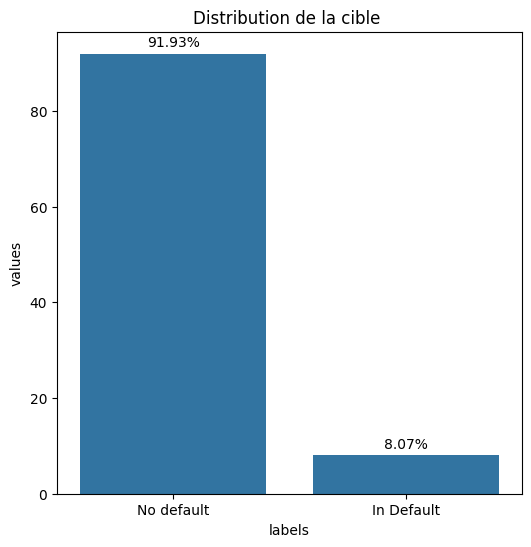

In [71]:
temp = train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })

cible = ['No default', 'In Default']

plt.figure(figsize = (6,6))
plt.title('Distribution de la cible ')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
colors = ['green', 'red']
ax.set_xticklabels(cible)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

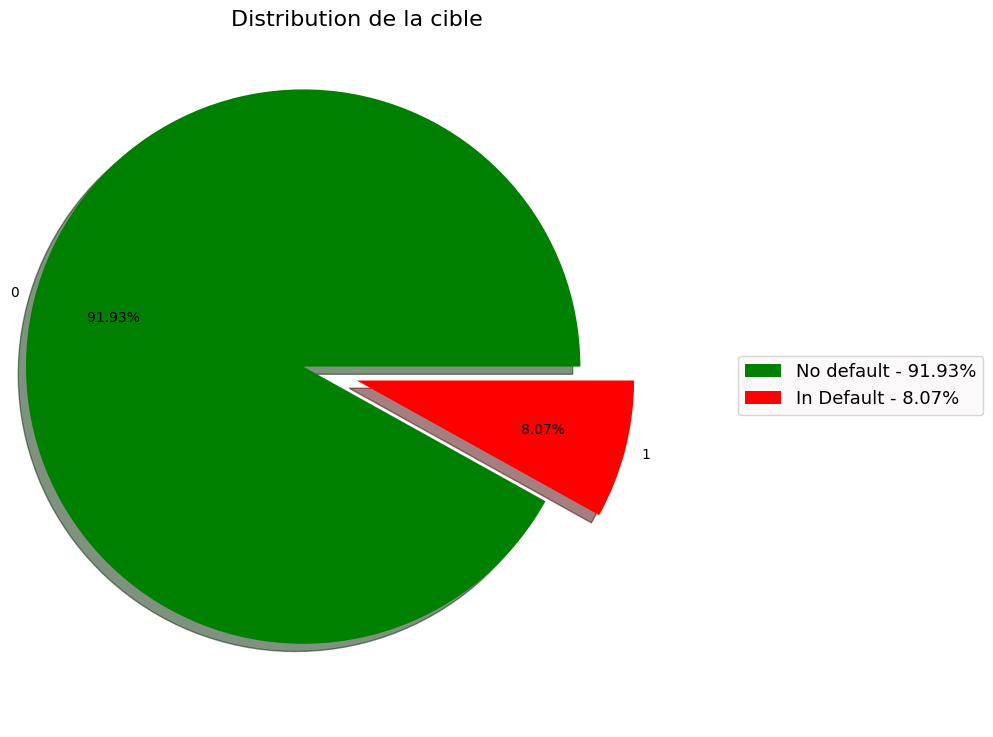

In [72]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if (val/total)>0.01 :
          # return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
          return '{p:.2f}% '.format(p=pct)
    return my_autopct

plt.figure(figsize = (9, 9))

colors = ['green', 'red']
cible = ['No default', 'In Default']

sns.set_palette(sns.color_palette(colors))

y = df_app_train['TARGET'].value_counts().index
x = df_app_train['TARGET'].value_counts().values
labels =y

plt.pie(x, labels=y,
           explode = [0.2, 0],
           autopct = make_autopct(x),
           pctdistance = 0.7,
           labeldistance = 1.06,
           shadow = True)

plt.title('Distribution de la cible', fontsize=16)

plt.legend(y, loc=[1.05,0.45], labels=['%s - %1.2f%%' % (l, s) for l, s in zip(cible, (x/sum(x))*100)],fontsize=13,facecolor='#fbf8f8')

Sexe du client

Graphique séparé, le pourcentage des prêts (par sexe du client) avec la valeur CIBLE 1 (prêt non remboursé).

In [73]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    #cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

#     # Ajouter les annotations sur les barres
#     for p in s.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy()
#         plt.annotate("%.2f" % p.get_height() + '%',
#                     (p.get_x()+p.get_width()/2, p.get_height()),
#                     ha='center',
#                     va='center',
#                     xytext=(0, 8),
#                     textcoords='offset points',
#                     fontsize = 10,
#                     )
    plt.show()

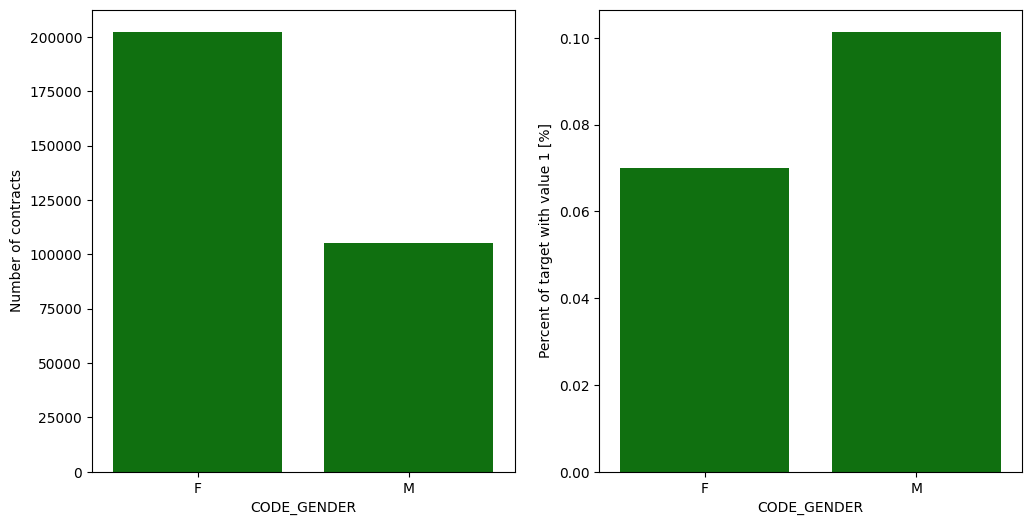

In [74]:
plot_stats('CODE_GENDER')

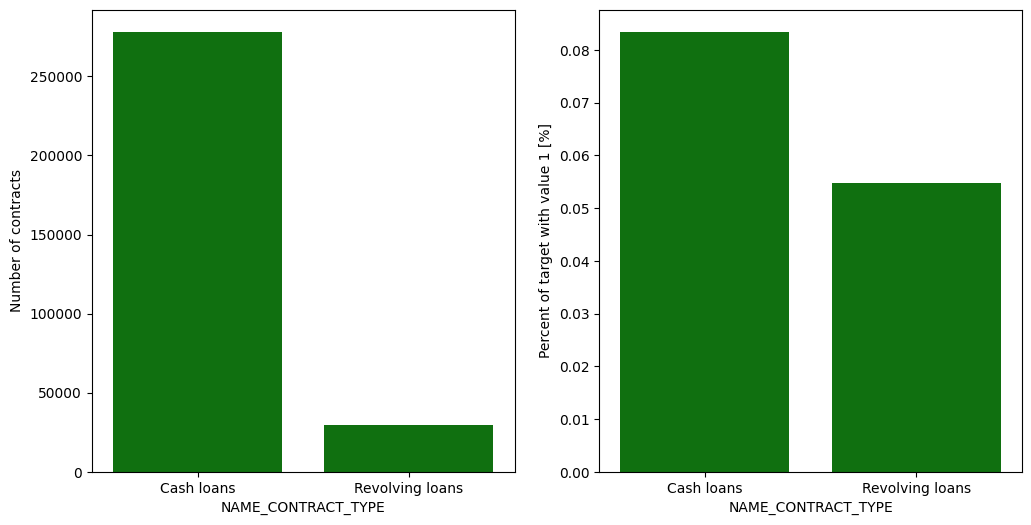

In [75]:
plot_stats('NAME_CONTRACT_TYPE')

Client avec ou sans voiture ou bien immobilier

Graphique qui indiquent si un client possède une voiture ou un bien immobilier
Graphique qui indiquent si un client possède une voiture ou un bien immobilier pour la cible 1

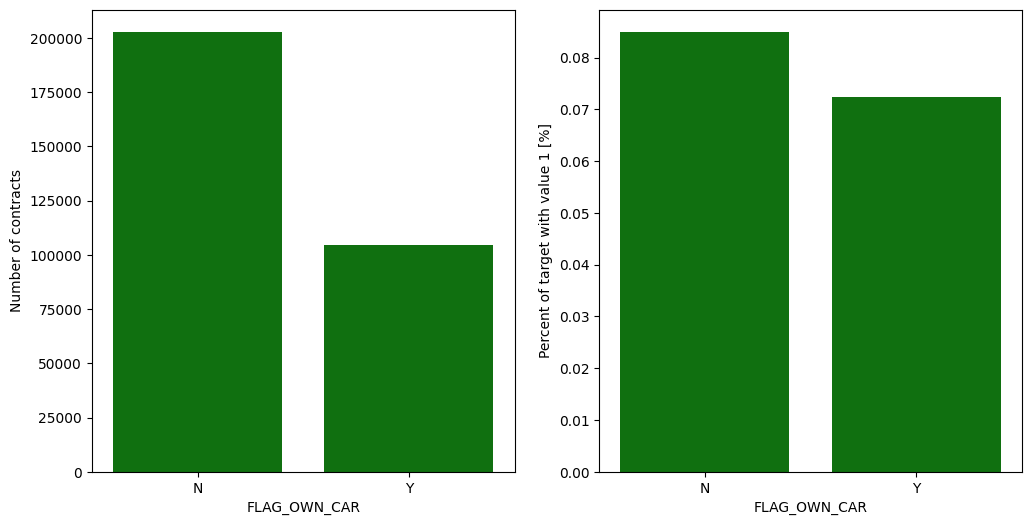

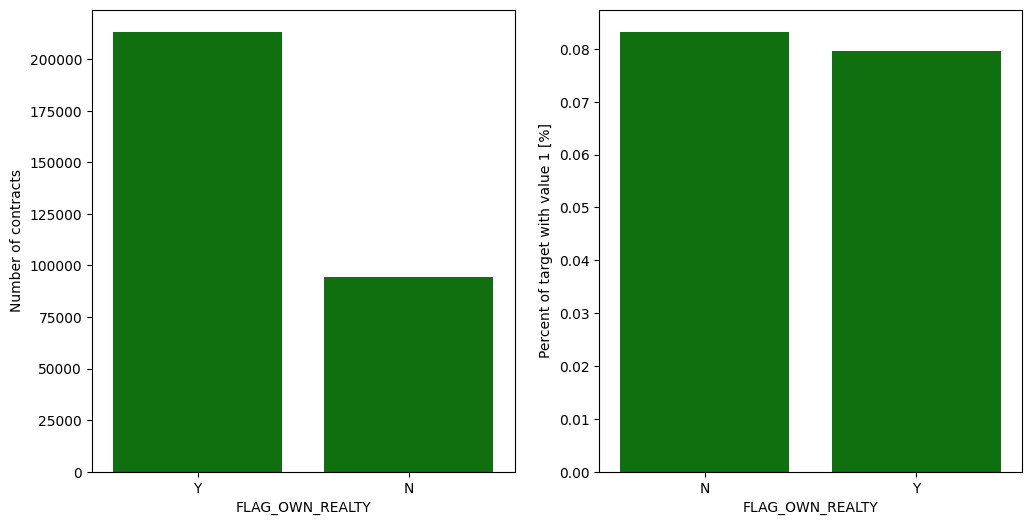

In [76]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

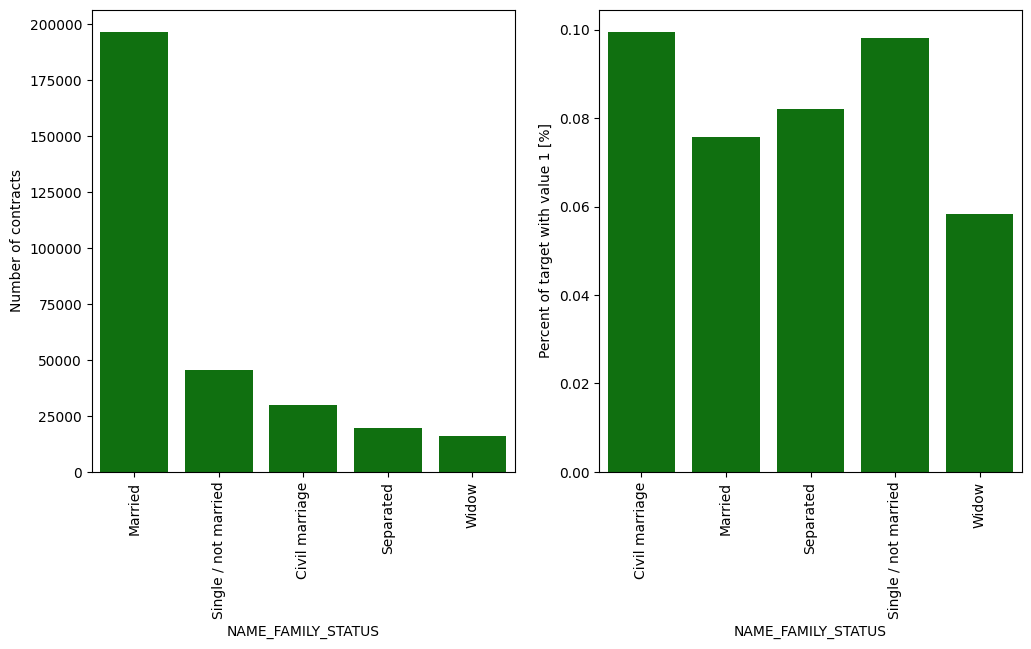

In [77]:
plot_stats('NAME_FAMILY_STATUS',True, True)

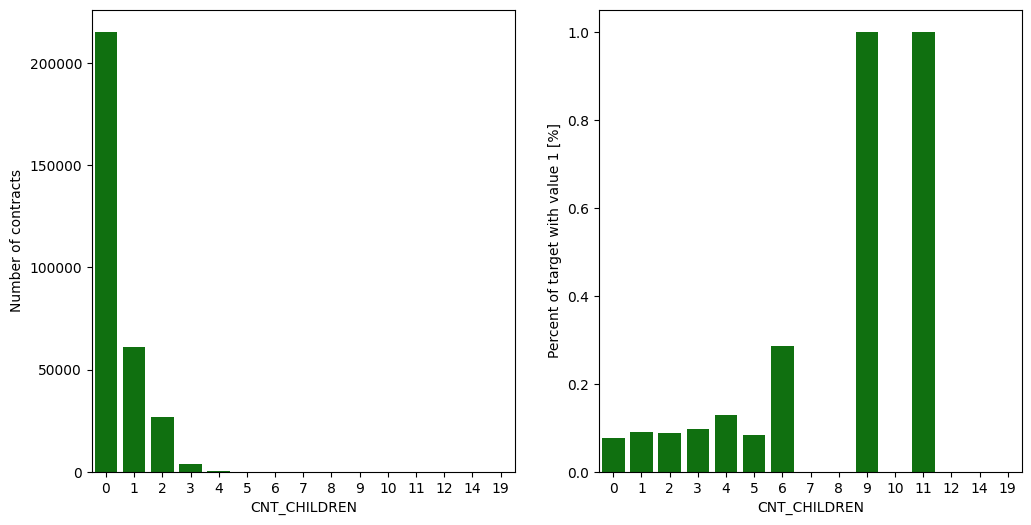

In [78]:
plot_stats('CNT_CHILDREN')

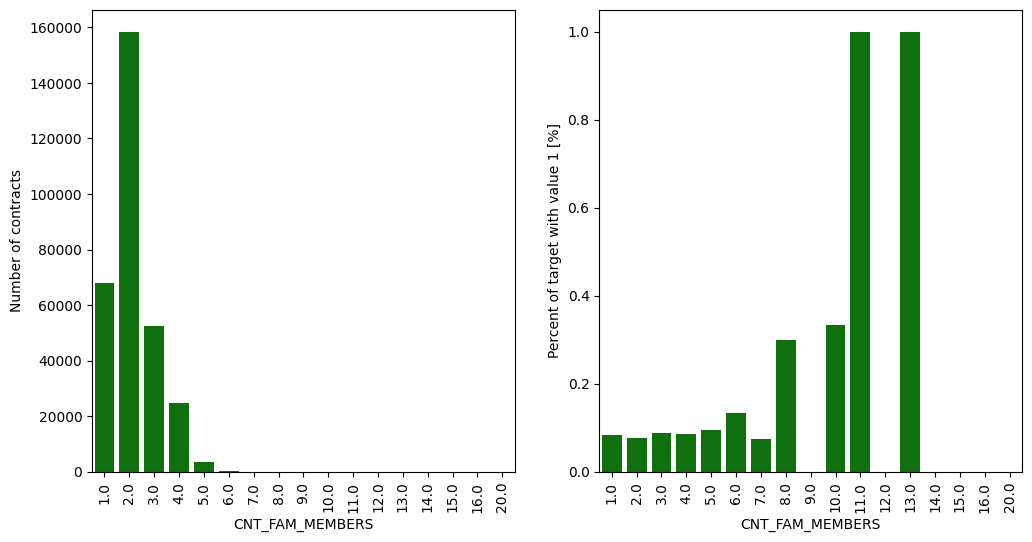

In [79]:
plot_stats('CNT_FAM_MEMBERS',True)

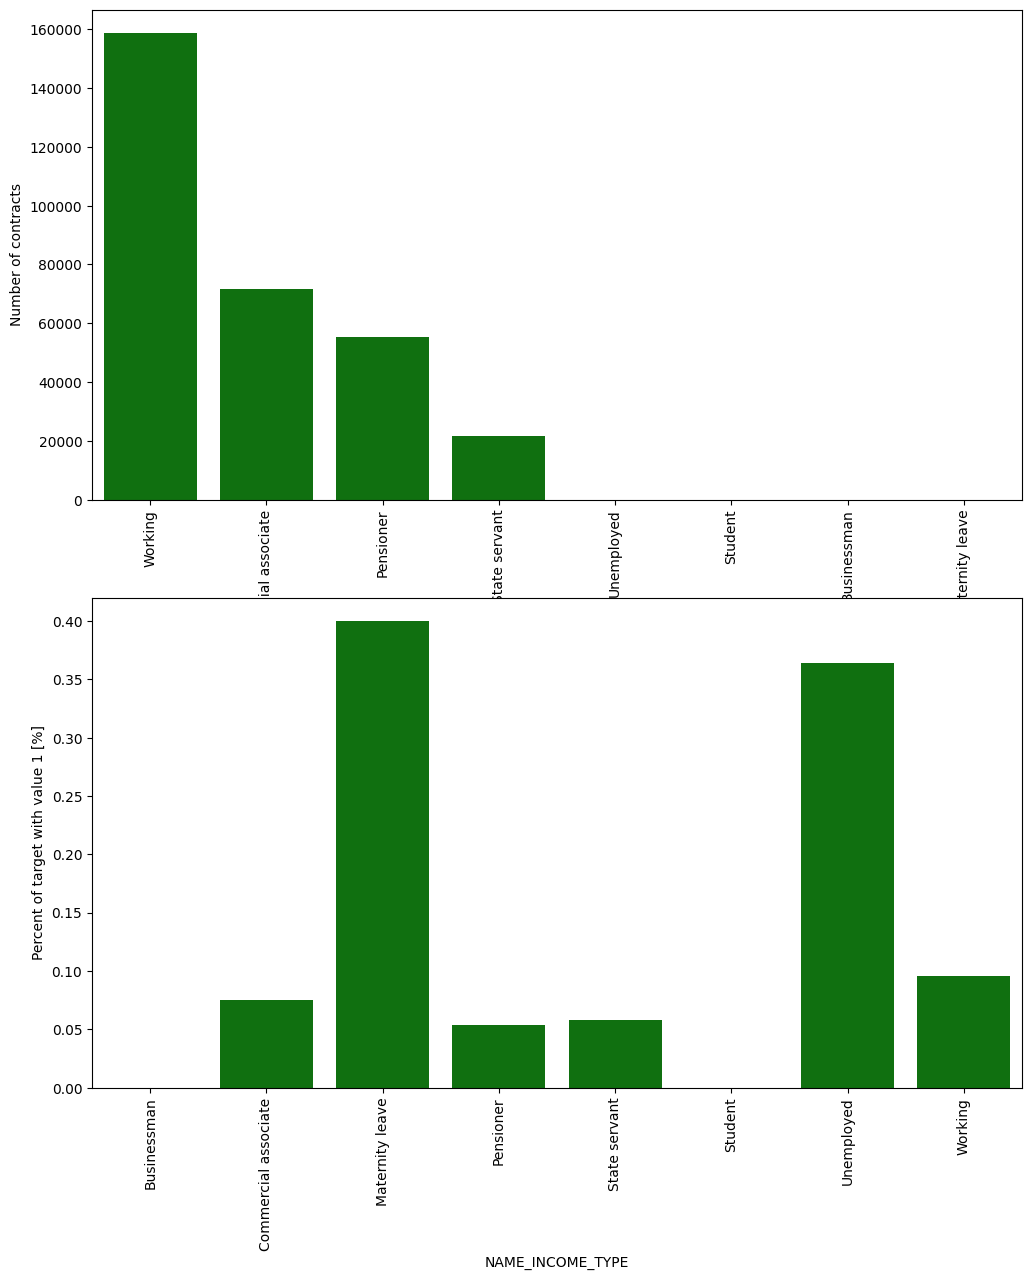

In [80]:
plot_stats('NAME_INCOME_TYPE',True,False)

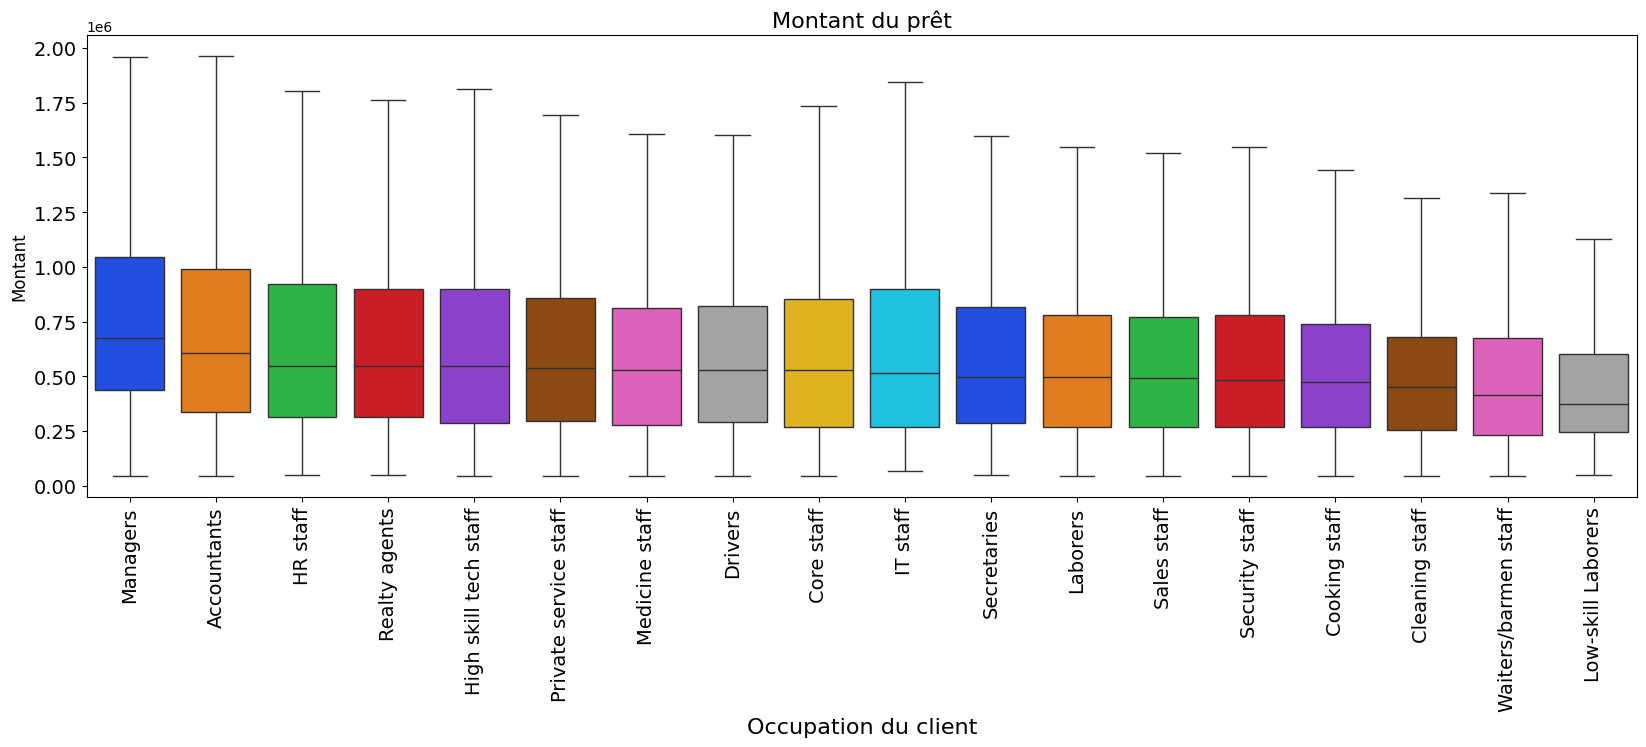

In [81]:
fig, ax = plt.subplots()

var_y = df_app_train['AMT_CREDIT']

grouped = df_app_train.loc[:,['OCCUPATION_TYPE', 'AMT_CREDIT']] \
    .groupby(['OCCUPATION_TYPE']) \
    .median() \
    .sort_values(by='AMT_CREDIT', ascending=False).head(20)



sns.boxplot(x= df_app_train['OCCUPATION_TYPE'], y = df_app_train['AMT_CREDIT'], data = df_app_train, order=grouped.index,showfliers=False, palette='bright')

fig.set_size_inches(20, 6)
ax.set_ylabel('Montant', fontsize=12)
ax.set_title("Montant du prêt", fontsize=16)

plt.xticks(rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Occupation du client', fontsize=16);

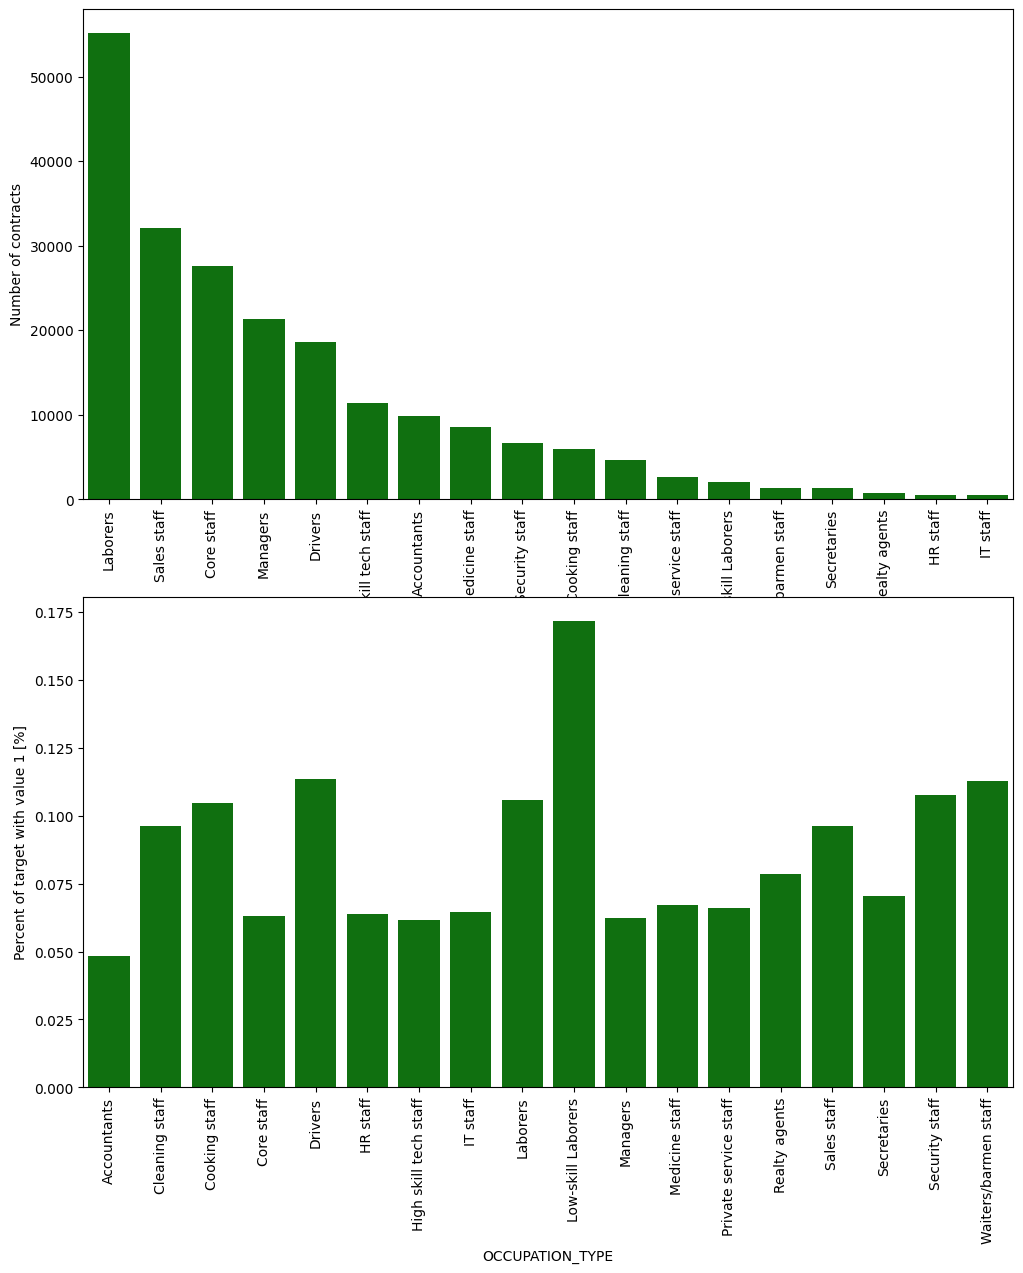

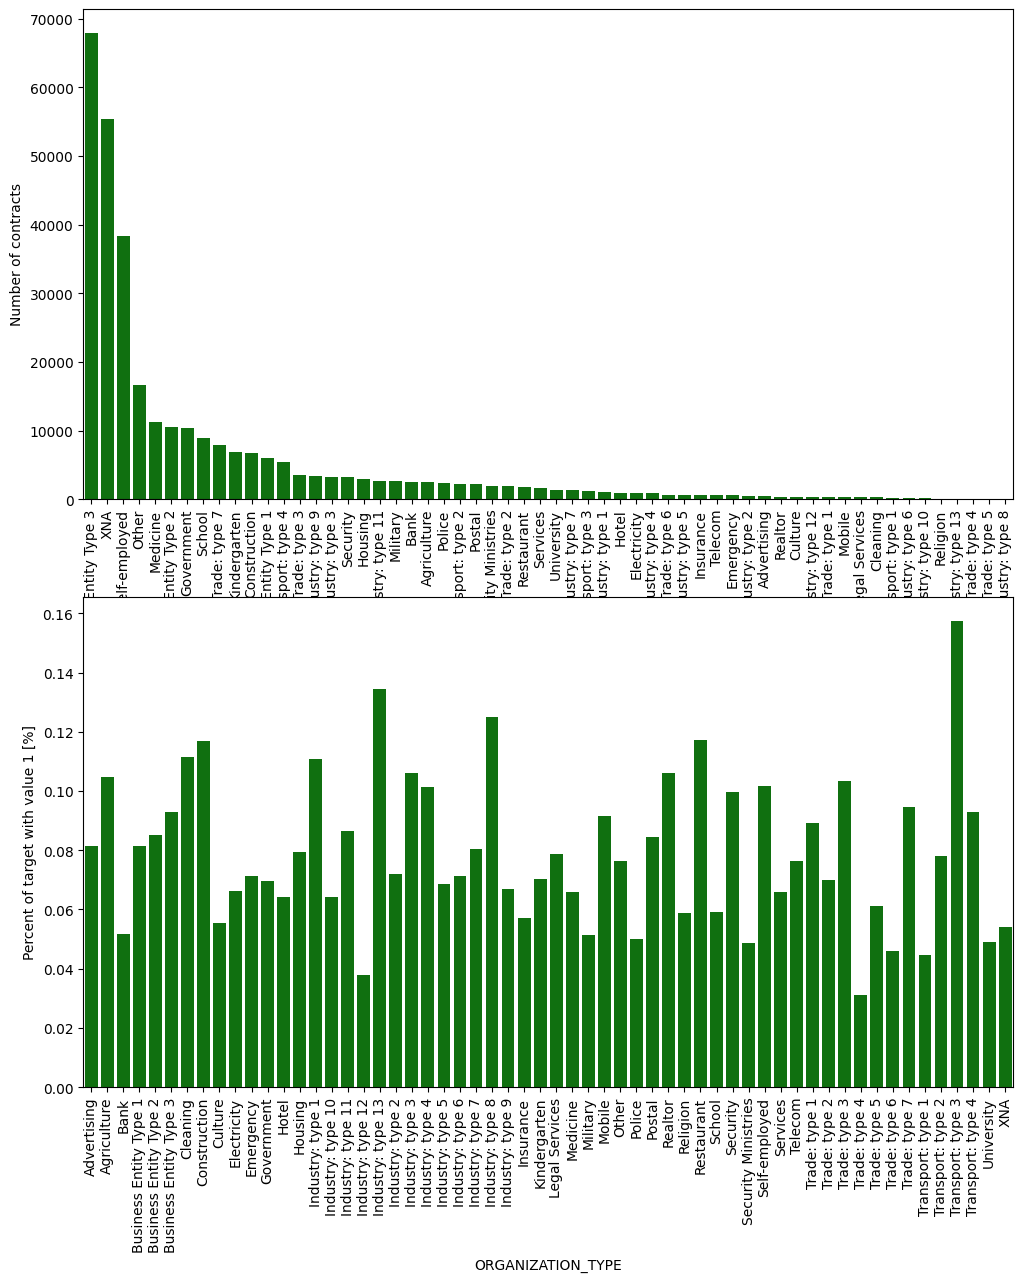

In [82]:
plot_stats('OCCUPATION_TYPE',True, False)
plot_stats('ORGANIZATION_TYPE',True, False)

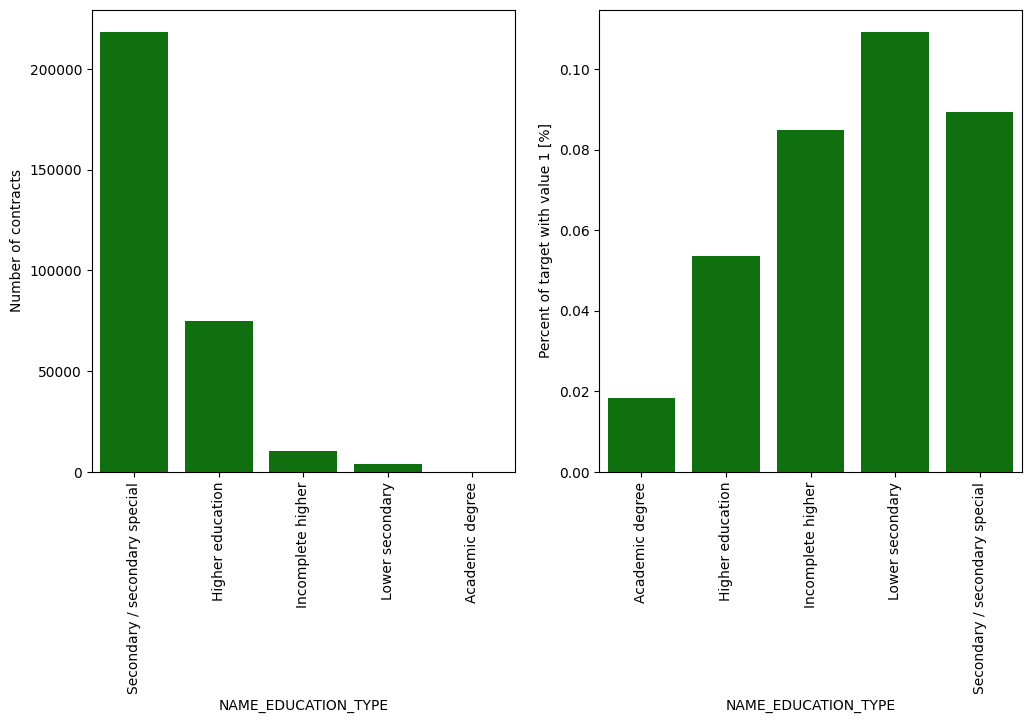

In [83]:
plot_stats('NAME_EDUCATION_TYPE',True)

In [84]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):

    colors = ['red', 'green']
    i = 0
    t1 = df_train.loc[df_train['TARGET'] != 0]
    t0 = df_train.loc[df_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t0[feature], bw_adjust=0.5,label="TARGET = 0")
        sns.kdeplot(t1[feature], bw_adjust=0.5,label="TARGET = 1")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
#         client = df_train[feature][df_train['SK_ID_CURR'] == 100020].values[0]
#         plt.axvline(client, c='red')
        plt.legend()
    plt.show()

<Figure size 640x480 with 0 Axes>

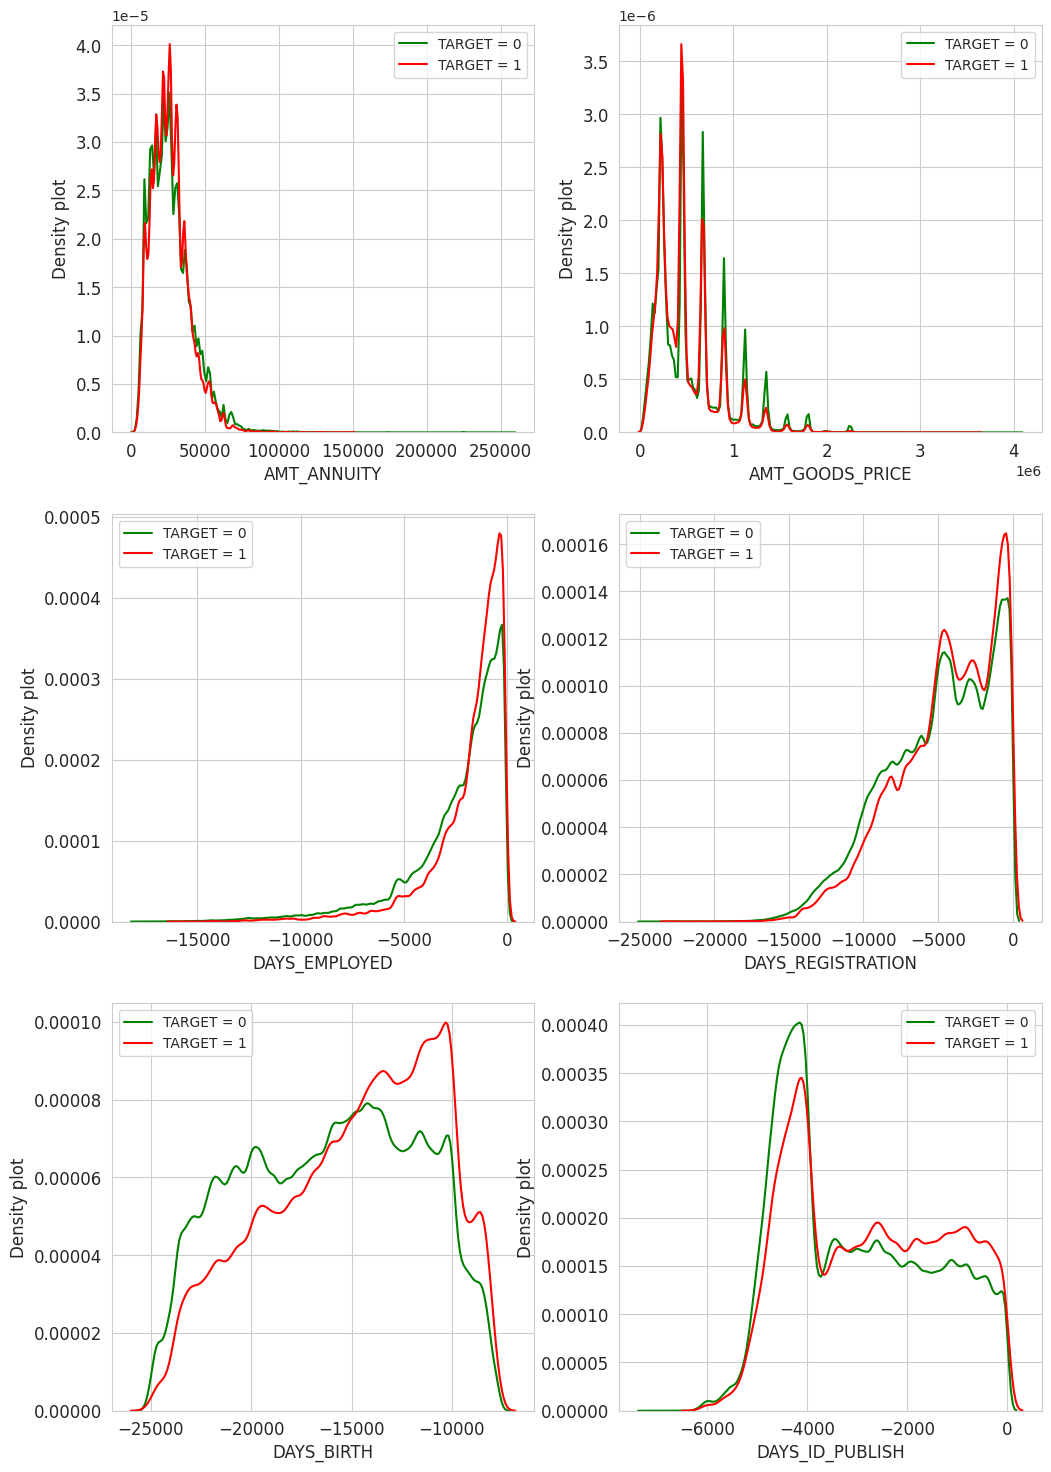

In [85]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

# Transformation et encodage des données

Supprimer les caractères spéciaux des noms des colonnes

In [86]:
import re

df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', ' ', x))

In [87]:
df_train.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -3648.0            -2120              1.0                     2   
1            -1186.0             -291              2.0                     1   
2            -4260.0            -2531              1.0                     2   
3            -9833.0            -2437              2.0                     2   
4            -4311.0            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  REGION  \
0                        0.0                         1.0       0   
1                        0.0                         0.0       0   
2                        0.0            

In [88]:
df_train.shape

(307505, 267)

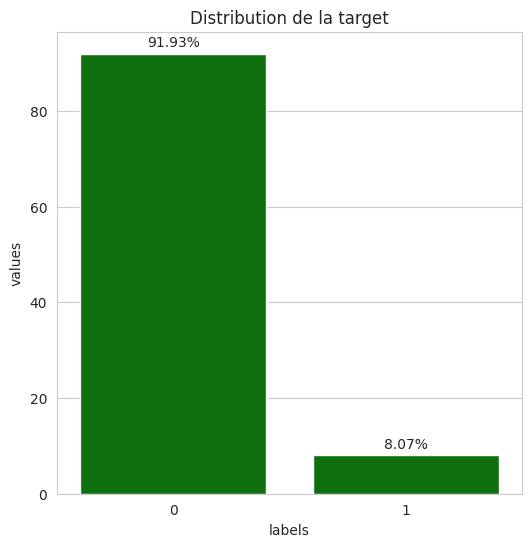

In [89]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Distribution de la target')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

In [90]:
# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index": "Feature"}, axis=1)

    print("Number of Variables include Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 0.3].shape[0] > 0:
        print("Full Missing Variables:", mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")

In [91]:
missing_values(df_train, plot=False)

Number of Variables include Missing Values: 201 

                            Feature  Num_Missing  Missing_Ratio DataTypes
0      APPROVED_DAYS_FIRST_DUE_MEAN        91221       0.296649   float64
1          PREV_DAYS_FIRST_DUE_MEAN        91221       0.296649   float64
2        ACTIVE_AMT_CREDIT_SUM_MEAN        90361       0.293852   float64
3    ACTIVE_CNT_CREDIT_PROLONG_MEAN        90360       0.293849   float64
4           ACTIVE_DAYS_CREDIT_MEAN        90360       0.293849   float64
..                              ...          ...            ...       ...
196        DEF_60_CNT_SOCIAL_CIRCLE         1021       0.003320   float64
197                 AMT_GOODS_PRICE          276       0.000898   float64
198                 EXT_SOURCE_MEAN          172       0.000559   float64
199                     AMT_ANNUITY           12       0.000039   float64
200          DAYS_LAST_PHONE_CHANGE            1       0.000003   float64

[201 rows x 4 columns] 



compter les valeurs infinies

In [92]:
count = np.isinf(df_train).values.sum()
count

0

Copier df_train

In [93]:
df_train1 = df_train.copy()

In [94]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 12185175


# Anomalies

Ont doit toujours regarder les Anomalies. Cela peut être dû à des chiffres mal saisis, à des erreurs dans l'équipement de mesure ou à des mesures valides mais extrêmes.
Les nombres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Pour voir ces statistiques en années, on peut multiplier par -1 et diviser par le nombre de jours dans une année :

In [95]:
(df_train1['DAYS_BIRTH'] / -365).describe()

count    307505.000000
mean         43.937122
std          11.956131
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

'DAYS_BIRTH' a l'air ok

In [96]:
df_train1['DAYS_EMPLOYED'].describe()

count    252131.000000
mean      -2384.155641
std        2338.331744
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

# Traitement des valeurs manquantes

In [97]:
# !pip install imbalanced-learn

In [98]:
# !pip uninstall scikit-learn force -y

In [99]:
# !pip install scikit-learn
# !pip install imbalanced-learn

In [100]:
from sklearn.impute import SimpleImputer

# Initialiser SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Affecter les colonnes avec les valeurs manquantes
col_nan = df_train1.columns[df_train1.isnull().any()].values

# X = imputer.fit_transform(df_train1)
df_train1[col_nan] = imputer.fit_transform(df_train1[col_nan])
df_train1.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -3648.0            -2120              1.0                     2   
1            -1186.0             -291              2.0                     1   
2            -4260.0            -2531              1.0                     2   
3            -9833.0            -2437              2.0                     2   
4            -4311.0            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                    0.000000                      0.000   
1                    0.000000                      0.000   
2                    0.000000                      0.000   
3                    0.006403                      0.007   
4                    0.000000                      0.000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                    0.000000                   0.000000   
1                    0.000000                   0.000000   
2                    0.000000                   0.000000   
3                    0.034363                   0.267389   
4                    0.000000                   0.000000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  REGION  \
0                   0.000000                    1.000000       0   
1                   0.000000                    0.000000       0   
2                   0.000000            

Nombre de valeurs manquantes

In [101]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 0


Enregistrer notre dataframe finale

In [102]:
df_train1.reset_index(drop=True)
df_train1 = reduce_mem_usage(df_train1)
df_train1.to_csv('df_train1.csv', index = False)

Memory usage of dataframe is 527.87 MB
Memory usage after optimization is: 167.74 MB
Decreased by 68.2%


In [103]:
df_train1 = reduce_mem_usage(pd.read_csv("df_train1.csv"))

Memory usage of dataframe is 626.40 MB
Memory usage after optimization is: 167.74 MB
Decreased by 73.2%


In [104]:
df_train1.isna().sum()

SK_ID_CURR                                 0
TARGET                                     0
NAME_CONTRACT_TYPE                         0
CODE_GENDER                                0
FLAG_OWN_CAR                               0
                                          ..
APPROVED_DAYS_DECISION_MEAN                0
APPROVED_CNT_PAYMENT_MEAN                  0
APPROVED_SELLERPLACE_AREA_MEAN             0
APPROVED_DAYS_FIRST_DUE_MEAN               0
APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN    0
Length: 267, dtype: int64

# Modeling

## Modèle LightGBM

### **Methode 1 : Smote**

In [105]:
df_train1 = reduce_mem_usage(pd.read_csv("df_train1.csv"))

Memory usage of dataframe is 626.40 MB
Memory usage after optimization is: 167.74 MB
Decreased by 73.2%


In [106]:
df_train1.memory_usage().sum() / 1024**2

167.74462509155273

In [107]:
df_train1['TARGET'].value_counts(normalize=True)

TARGET
0    0.91927
1    0.08073
Name: proportion, dtype: float64

Notre classifications est baias, n'est pas equilibre

Un problème avec une classification déséquilibrée est qu’il y a trop peu d’exemples de classe minoritaire pour qu’un modèle puisse apprendre efficacement la limite de décision.

Une façon de résoudre ce problème consiste à suréchantillonner les exemples de la classe minoritaire. Ceci peut être réalisé en dupliquant simplement des exemples de la classe minoritaire dans l'ensemble de données de formation avant d'ajuster un modèle. Cela peut équilibrer la répartition des classes mais ne fournit aucune information supplémentaire au modèle.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [108]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [109]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.4 MB/s eta 0:00:00


In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [111]:
# # Rename features with special characters
# df_train1.columns = df_train1.columns.str.replace('[^a-zA-Z0-9]', '_')

In [112]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=120,stratify=y)

In [114]:
y_test.value_counts()

TARGET
0    56536
1     4965
Name: count, dtype: int64

Nous allons nous assurer que nous avons les mêmes fractionnements de données à chaque fois. Nous pouvons nous en assurer en créant un KFold objet kf, et en passant cv=kf à la place du plus commun cv=5

In [115]:
df_train1[df_train1['TARGET']==1].head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1                   0            0             0   
26      100031       1                   0            1             0   
40      100047       1                   0            0             0   
42      100049       1                   0            1             0   
81      100096       1                   0            1             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0             0          202500.0    406597.5      24700.5   
26                0             0          112500.0    979992.0      27076.5   
40                0             0          202500.0   1193580.0      35028.0   
42                1             0          135000.0    288873.0      16258.5   
81                0             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          351000.0                    0.018799       -9461         -637.0   
26         702000.0                    0.018036      -18724        -2628.0   
40         855000.0                    0.025162      -17482        -1262.0   
42         238500.0                    0.007305      -13384        -3596.0   
81         252000.0                    0.028656      -24794        -2384.0   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             -3648.0            -2120              1.0                     2   
26            -6572.0            -1827              1.0                     3   
40            -1182.0            -1029              2.0                     2   
42              -45.0            -4409              2.0                     3   
81            -5392.0            -4199              2.0                     2   

    REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                             2                       10   
26                            2                        9   
40                            2                        9   
42                            3                       11   
81                            2                       10   

    OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
26                      10.0                       1.0   
40                       0.0                       0.0   
42                       1.0                       0.0   
81                       1.0                       1.0   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
26                      10.0                       0.0   
40                       0.0                       0.0   
42                       1.0                       0.0   
81                       1.0                       1.0   

    DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  -1134.0                         0.0   
26                  -161.0                         0.0   
40                 -1075.0                         0.0   
42                 -1480.0                         0.0   
81                     0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         0.0                         0.0   
26                        0.0                         0.0   
40                        0.0                         0.0   
42                        0.0                         0.0   
81                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   
26                        0.0                        2.0   
40                        2.0                        0.0   
42                        0.0                        0.0   
81                        0.0                        

In [116]:
# cross validation
kf = KFold(n_splits=5,shuffle=False)

In [117]:
# Parameter Grid
param_distributions = {
                        'learning_rate':[0.01, 0.1,0.09],
                        'reg_alpha': [0,7, 10,20],
                        'n_estimators': [100,400,800,1000],
                        'max_depth': [5,10,20],
                        'colsample_bytree': [0.01, 0.1,0.2,0.3],
                        'min_child_samples': [10,20,50],
                        'min_child_weight':[5,10,20],
                        'num_leaves':[10,15,20],
                        'reg_lambda':[10,50,70,100],
                        'scale_pos_weight':[6,7,8,10,11,12,15,17],
}

In [118]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.3 MB/s eta 0:00:00


In [119]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [120]:
pipeline = Pipeline([
        ('smote', SMOTE()),
        ('lgbm', LGBMClassifier())
    ])

params_lgbm = {'lgbm__' + key: param_distributions[key] for key in param_distributions}

# use RandomizedSearchCV insteed of GridSearchCV because we have a large dataset and this one is faster
random_search_smote = RandomizedSearchCV(estimator=pipeline,
                           param_distributions=params_lgbm,
                           scoring='roc_auc',
                           cv=kf,
                           n_iter=9             )

random_search_smote.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 180912, number of negative: 180912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60426
[LightGBM] [Info] Number of data points in the train set: 361824, number of used features: 252
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 180944, number of negative: 180944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6032

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE()),
                                             ('lgbm', LGBMClassifier())]),
                   n_iter=9,
                   param_distributions={'lgbm__colsample_bytree': [0.01, 0.1,
                                                                   0.2, 0.3],
                                        'lgbm__learning_rate': [0.01, 0.1,
                                                                0.09],
                                        'lgbm__max_depth': [5, 10, 20],
                                        'lgbm__min_child_samples': [10, 20, 50],
                                        'lgbm__min_child_weight': [5, 10, 20],
                                        'lgbm__n_estimators': [100, 400, 800,
                                                               1000],
                                        'lgbm__num_leaves': [10, 15, 20],
                                        'lgbm__reg_alpha': [0, 7, 10, 20],
                                        'lgbm__reg_lambda': [10, 50, 70, 100],
                                        'lgbm__scale_pos_weight': [6, 7, 8, 10,
                                                                   11, 12, 15,
                                                                   17]},
                   scoring='roc_auc')

In [121]:
y_train.value_counts()

TARGET
0    226144
1     19860
Name: count, dtype: int64

In [122]:
best_param = random_search_smote.best_params_
best_param

{'lgbm__scale_pos_weight': 8,
 'lgbm__reg_lambda': 100,
 'lgbm__reg_alpha': 10,
 'lgbm__num_leaves': 15,
 'lgbm__n_estimators': 1000,
 'lgbm__min_child_weight': 5,
 'lgbm__min_child_samples': 20,
 'lgbm__max_depth': 20,
 'lgbm__learning_rate': 0.09,
 'lgbm__colsample_bytree': 0.3}

In [123]:
# best roc_auc score
random_search_smote.best_score_

0.7620567898757191

Enregistrer le meilleur modèle

In [124]:
best_lgbm_smote = random_search_smote.best_estimator_

In [125]:
import joblib

In [126]:
# save the model to a file
joblib.dump(best_lgbm_smote, 'best_lgbm_smote.joblib')

['best_lgbm_smote.joblib']

In [127]:
!pip install --upgrade --ignore-installed blinker==1.5

In [128]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [129]:
import mlflow
from mlflow.models import infer_signature

In [130]:
X_train['NAME_CONTRACT_TYPE'].dtype

dtype('int8')

In [131]:
# infer signature with params
signature = infer_signature(X_train, y_train)

Prédire le résultat sur les données test

In [132]:
#model already exists and is not empty
# mlflow.sklearn.save_model(best_lgbm_smote, 'mlflow_model', signature=signature)

In [133]:
y_pred_smote=best_lgbm_smote.predict_proba(X_test)

In [134]:
def credit_decision(customers_data, model, threshold):
    '''- threshold: The probability threshold to classify credits as approved (0) or defaulted (1).'''

    # Predict probabilities for all classes using the model
    y_pred_proba = model.predict_proba(customers_data)[:, 1]

    # Create a DataFrame with customer IDs and their probability of default
    customer_probabilities = pd.DataFrame({
        'Customer ID': customers_data.index,  # Assuming the index is a customer ID or similar
        'Probability of Default': y_pred_proba,
        'Credit Decision': (y_pred_proba > threshold).astype(int)
    })

    # Return the DataFrame with customer IDs, probability of default, and credit decision
    return customer_probabilities


In [135]:
# model = best_lgbm_smote

# def credit_decision (customers_data, model, threshold):
#     '''- threshold: The probability threshold to classify credits as approved (0) or defaulted (1).'''

#        #customers_data = X_test.copy()
#         y_pred_over = model.predict_proba(customers_data)
#         y_pred_1 = y_pred_over[:, 1]
#         # pred_probs = y_pred_over[:, 1]

#         customer_probabilities = pd.DataFrame({
#             'Customer ID': customers_data.index,  # Assuming the index is a customer ID or similar
#             'Probability of Default': y_pred_1
#         })

#         threshold = 0.725

#         # Appliquer le meilleur seuil pour classer les candidats
#         customer_probabilities['Credit Decision'] = (y_pred_1 > threshold).astype(int)

#         print(customer_probabilities.head())

In [136]:
# credit_decision(df_train1, best_lgbm_smote, 0.725)
credit_decision(X_test, best_lgbm_smote, 0.725)

Customer ID  Probability of Default  Credit Decision
0           216689                0.040880                0
1            37196                0.369463                0
2            57170                0.122411                0
3           269993                0.375340                0
4           134505                0.124964                0
...            ...                     ...              ...
61496       248676                0.118625                0
61497       221907                0.486269                0
61498       195437                0.105150                0
61499       271682                0.673247                0
61500       283531                0.176746                0

[61501 rows x 3 columns]

In [225]:
filename = 'best_lgbm_smote.sav'
pickle.dump(best_lgbm_smote, open(filename, 'wb'))

NameError: name 'pickle' is not defined

Score AUC

In [137]:
from sklearn.metrics import roc_auc_score

print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_smote[:, 1])))

LightGBM RandomizedSearchCV Model ROCAUC score: 0.7719


In [138]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#Afficher les scores
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, np.argmax(y_pred_smote,axis = 1))))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, np.argmax(y_pred_smote,axis = 1))))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, np.argmax(y_pred_smote,axis = 1))))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, np.argmax(y_pred_smote,axis = 1))))

LightGBM RandomizedSearchCV Model precision score: 0.2120
LightGBM RandomizedSearchCV Model recall score: 0.5511
LightGBM RandomizedSearchCV Model accuracy score: 0.7984
LightGBM RandomizedSearchCV Model F1 score: 0.3062


In [139]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred_smote,axis = 1)))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     56536
           1       0.21      0.55      0.31      4965

    accuracy                           0.80     61501
   macro avg       0.58      0.69      0.59     61501
weighted avg       0.89      0.80      0.84     61501



[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

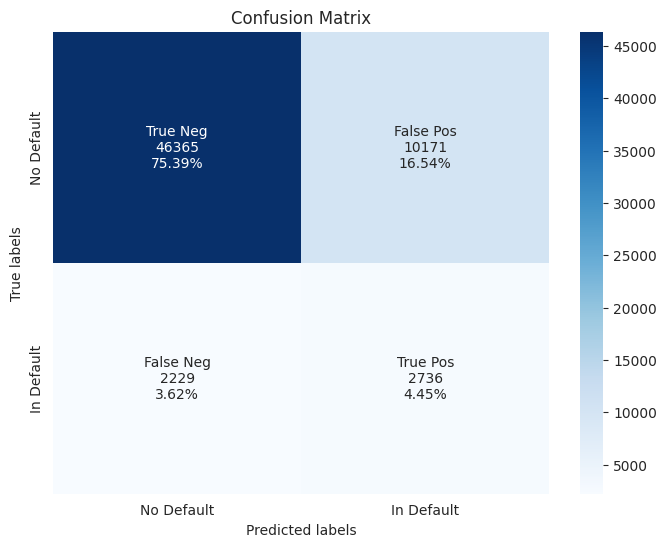

In [140]:
#Matrice de confusion
cm = confusion_matrix(y_test, np.argmax(y_pred_smote,axis = 1))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

**Seuil optimal pour la courbe ROC**

In [141]:
y_pred_1 = y_pred_smote[:, 1]

In [142]:
def tune_threshold(true_labels, predicted_probas):
    fpr, tpr, threshold = roc_curve(true_labels, predicted_probas)
    j_stat = tpr - fpr
    index_for_best_threshold = np.argmax(j_stat)

    return threshold[index_for_best_threshold]


def proba_to_class(proba, threshold):
     return np.where(proba >= threshold, 1, 0)

# Annoter le seuil optimal AUC
def annot_auc(x,y, ax=None):
    plt.annotate("{:.3f}".format(y), xy=(x, y), xytext=(x*2, y/2), fontsize=12,
                     bbox=dict(facecolor='white', fc ="0.99", edgecolor='black', boxstyle='round'),
                     arrowprops=dict(arrowstyle = "->",connectionstyle = "angle,angleA=90,angleB=180,rad=0",color='black')
                     )

In [143]:
from sklearn.metrics import roc_curve
from numpy import argmax

# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.399045


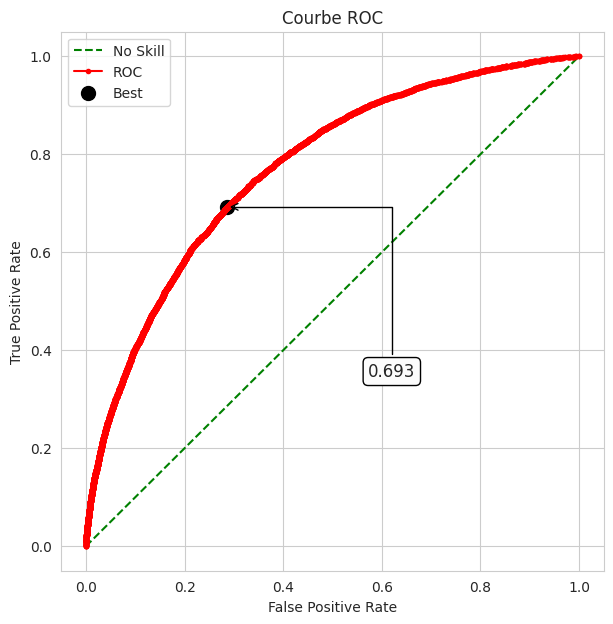

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

# graphique roc curve du modèle
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.title('Courbe ROC')

annot_auc(fpr[ix],tpr[ix])

# Afficher le graphique
plt.show()

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

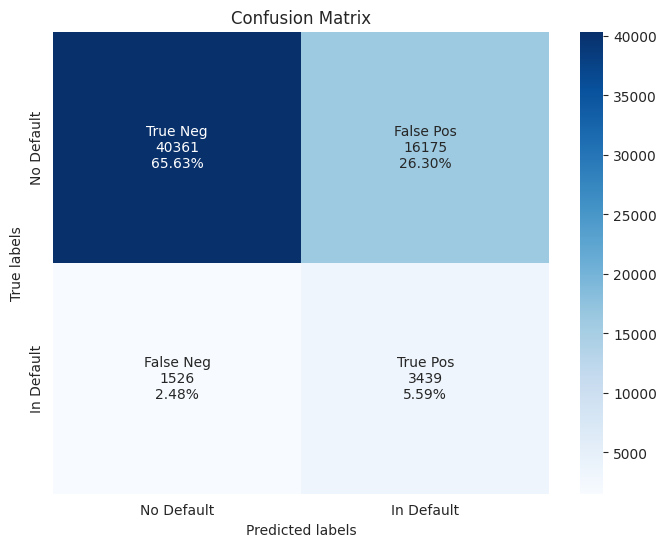

In [145]:
#Matrice de confusion
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

In [146]:
#classification report
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56536
           1       0.18      0.69      0.28      4965

    accuracy                           0.71     61501
   macro avg       0.57      0.70      0.55     61501
weighted avg       0.90      0.71      0.78     61501



In [147]:
#Aficher les scores
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_roc)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_roc)))

LightGBM RandomizedSearchCV Model precision score: 0.1753
LightGBM RandomizedSearchCV Model recall score: 0.6926
LightGBM RandomizedSearchCV Model accuracy score: 0.7122
LightGBM RandomizedSearchCV Model F1 score: 0.2798


Seuil optimal pour la courbe de rappel / précision

In [148]:
from sklearn.metrics import precision_recall_curve

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)

# Calculate F-score
fscore = np.zeros_like(precision)
denominator = precision + recall
denominator[denominator == 0] = np.nan  # Avoid division by zero
fscore = (2 * precision * recall) / denominator

# Locate the index of the largest F-score
ix = np.nanargmax(fscore)  # Ignore NaN values
best_threshold = thresholds[ix]
best_fscore = fscore[ix]

print(f"Best Threshold={best_threshold:.6f}, F-Score={best_fscore:.3f}")

Best Threshold=0.606829, F-Score=0.318


In [149]:
# #Evaluation
# # convert to f score
# fscore = (2 * precision * recall) / (precision + recall)
# # locate the index of the largest f score
# ix = argmax(fscore)
# print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

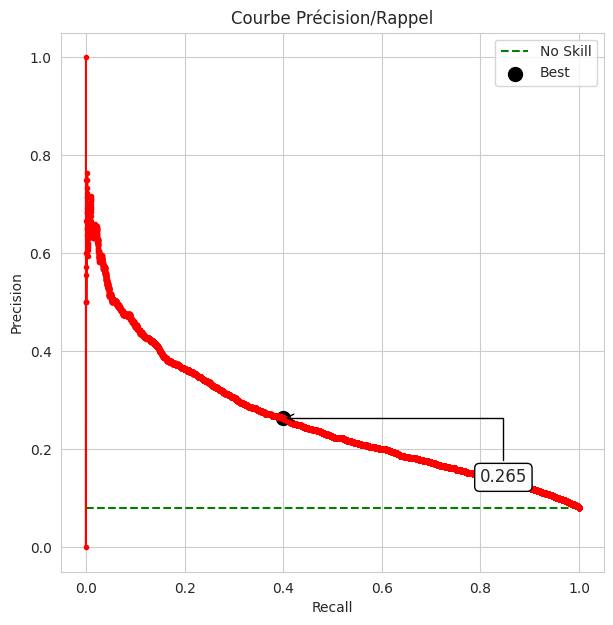

In [150]:
# plot the roc curve for the model
plt.figure(figsize=(7,7))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.title('Courbe Précision/Rappel')
annot_auc(recall[ix],precision[ix])

# show the plot
plt.show()

In [151]:
#Fonction pour créer des labels en appliquant le seuil aux probabilités positives
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

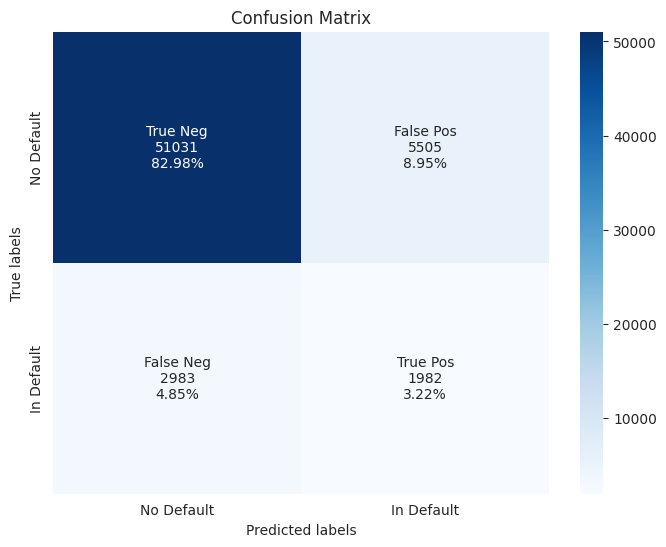

In [152]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

In [153]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     56536
           1       0.26      0.40      0.32      4965

    accuracy                           0.86     61501
   macro avg       0.60      0.65      0.62     61501
weighted avg       0.89      0.86      0.87     61501



Afficher les scores

In [154]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_precision_recall)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_precision_recall)))

LightGBM RandomizedSearchCV Model precision score: 0.2647
LightGBM RandomizedSearchCV Model recall score: 0.3992
LightGBM RandomizedSearchCV Model accuracy score: 0.8620
LightGBM RandomizedSearchCV Model F1 score: 0.3183


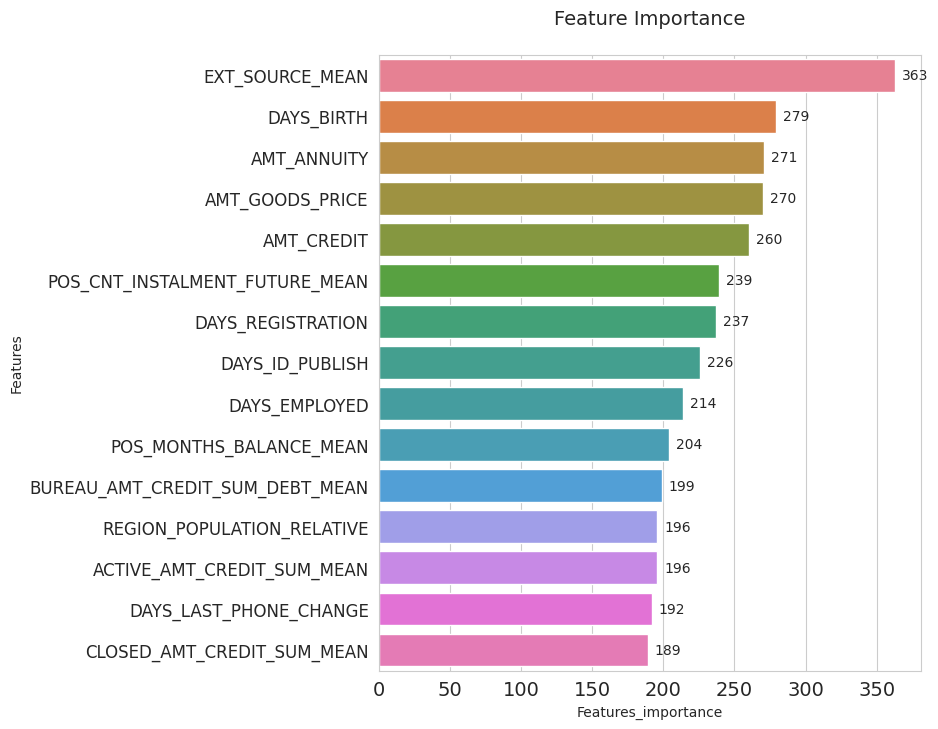

In [155]:
import warnings

# Créer dataframe des parametres les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':best_lgbm_smote['lgbm'].feature_importances_
              })

df_feature_importance_15 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(15)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_15, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Feature Importance\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

**Seuil métier**

Le seuil optimal consiste à calculer le gain obtenu pour l'ensemble des individus du jeu de données.

Pour cela nous avons fixé un poids arbitraire pour chacune des prédictions relativement à leurs valeurs réelles.

Les valeurs des poids sont les suivantes :

fn_value = -10
tp_value = 0
tn_value = 0
fp_value = -1

In [156]:
# Définition de la métrique 'banking'
def Ind_bank(y_test, y_pred, fn_value=-10, fp_value=-1, tp_value=0, tn_value=0):

    # Matrice de Confusion
    mat_conf = confusion_matrix(y_test, y_pred)

    # Nombre de True Negatifs
    tn = mat_conf[0, 0]
    # Nombre de Faux Négatifs
    fn = mat_conf[1, 0]
    # Nombre de Faux Positifs
    fp = mat_conf[0, 1]
    # Nombre de True Positifs
    tp = mat_conf[1, 1]

    # Gain normalisé entre 0 et 1
    J_normalized = fn_value*fn + fp_value*fp

    return J_normalized  # Retourne la fonction d'évaluation

# Evolution du gain en fonction du seuil de solvabilité fixé Si score < seuil : client solvable, Sinon : client non solvable
def gain_seuil(y_pred_1, y_set):

    """
    Evolution du gain en fonction du seuil de solvabilité fixé
    Si score < seuil : client solvable
    Sinon : client non solvable

    """
    cost_function = []
    threshold_x = np.linspace(0.0, 1, 1000)

    for threshold in threshold_x:


        # y_pred_1 > seuil de solvabilité : retourne 1 sinon 0
        y_pred = (y_pred_1 > threshold)

        y_pred = np.array(y_pred > 0) * 1
        # Calcul de l'indice bancaire
        cost_function.append(Ind_bank(y_set, y_pred))


    # Affichage du gain en fonction du seuil de solvabilité
    plt.figure(figsize=(8, 8))
    plt.plot(threshold_x, cost_function)
    annot_max(threshold_x,cost_function)
    plt.grid()
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice banquaire")
    plt.xticks(np.linspace(0.1, 1, 10))


# Fonction pour annoter le seuil de solvabilité dans le graphique
def annot_max(x,y, ax=None):
    ymax = max(y)
    xpos = np.argmax(y)
    xmax = x[xpos]

    text= "Seuil de solvabilité={:.3f}".format(xmax)
    plt.axvline(xmax, c='red', linewidth=0.9,  alpha=0.8)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(facecolor='white', fc ="0.99", edgecolor='black', boxstyle='round')
    arrowprops=dict(arrowstyle = "->",connectionstyle = "angle,angleA=90,angleB=180,rad=0",color='black')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

Graphique avec le seuil métier

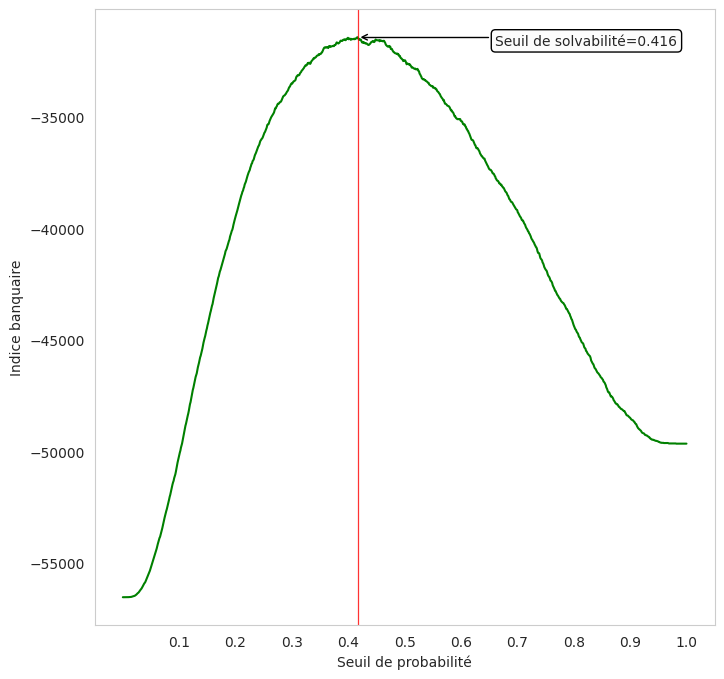

In [157]:
gain_seuil(y_pred_1, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     56536
           1       0.27      0.38      0.31      4965

    accuracy                           0.87     61501
   macro avg       0.61      0.64      0.62     61501
weighted avg       0.89      0.87      0.88     61501



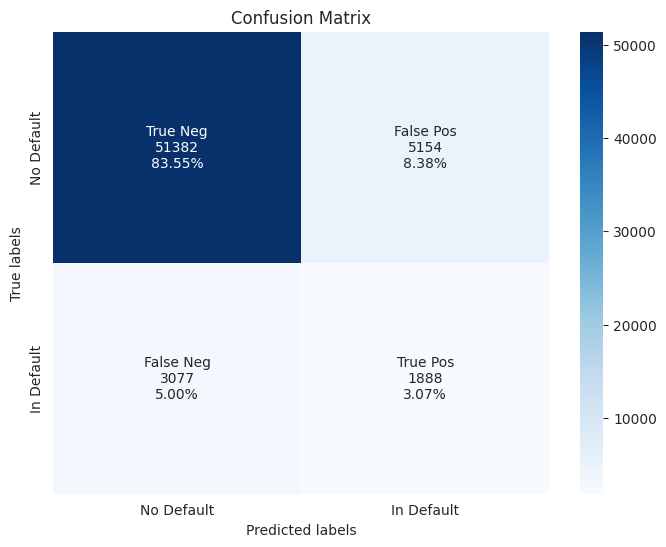

In [158]:
# Définition d'un seuil de classification
threshold = 0.617
pred_metier = (y_pred_smote[:,1] > threshold).astype(int)

cm = confusion_matrix(y_test, pred_metier)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

print('Classification Report')
print(classification_report(y_test, pred_metier))

In [159]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, pred_metier)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, pred_metier)))

LightGBM RandomizedSearchCV Model precision score: 0.2681
LightGBM RandomizedSearchCV Model recall score: 0.3803
LightGBM RandomizedSearchCV Model accuracy score: 0.8662
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6445
LightGBM RandomizedSearchCV Model F1 score: 0.3145


### **Méthode 2 : Oversampling**

In [160]:
from imblearn.over_sampling import RandomOverSampler

print("shape target before handling",'\n',y.value_counts())

over  = RandomOverSampler(sampling_strategy=0.5)

pipe_over = Pipeline([
                ('over', over)
                ])
X_over, y_over = pipe_over.fit_resample(X_train, y_train)

print("shape target after handling",'\n',y_over.value_counts())

shape target before handling 
 TARGET
0    282680
1     24825
Name: count, dtype: int64
shape target after handling 
 TARGET
0    226144
1    113072
Name: count, dtype: int64


In [161]:
param_distributions_over={
                            'colsample_bytree': [0.1],
                            'learning_rate': [0.09],
                            'max_depth': [5],
                            'min_child_samples': [10],
                            'min_child_weight': [5],
                            'n_estimators': [1000],
                            'num_leaves': [20],
                            'reg_alpha': [20],
                            'reg_lambda': [100],
                            'scale_pos_weight': [7]
}

Validation croisée RandomizedSearchCV :

In [162]:
pipeline = Pipeline([
                    ('lgbm', LGBMClassifier())
                ])
params_lgbm = {'lgbm__' + key: param_distributions_over[key] for key in param_distributions_over}

random_search_over = RandomizedSearchCV(estimator=pipeline,
                           param_distributions=params_lgbm,
                           scoring='balanced_accuracy',
                           cv=kf)

random_search_over.fit(X_over, y_over)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 107552, number of negative: 163820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22154
[LightGBM] [Info] Number of data points in the train set: 271372, number of used features: 252
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396327 -> initscore=-0.420794
[LightGBM] [Info] Start training from score -0.420794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__colsample_bytree': [0.1],
                                        'lgbm__learning_rate': [0.09],
                                        'lgbm__max_depth': [5],
                                        'lgbm__min_child_samples': [10],
                                        'lgbm__min_child_weight': [5],
                                        'lgbm__n_estimators': [1000],
                                        'lgbm__num_leaves': [20],
                                        'lgbm__reg_alpha': [20],
                                        'lgbm__reg_lambda': [100],
                                        'lgbm__scale_pos_weight': [7]},
                   scoring='balanced_accuracy')

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

In [163]:
from sklearn.model_selection import GridSearchCV

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__colsample_bytree': [0.1],
                                        'lgbm__learning_rate': [0.09],
                                        'lgbm__max_depth': [5],
                                        'lgbm__min_child_samples': [10],
                                        'lgbm__min_child_weight': [5],
                                        'lgbm__n_estimators': [1000],
                                        'lgbm__num_leaves': [20],
                                        'lgbm__reg_alpha': [20],
                                        'lgbm__reg_lambda': [100],
                                        'lgbm__scale_pos_weight': [7]},
                   scoring='balanced_accuracy')

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__colsample_bytree': [0.1],
                                        'lgbm__learning_rate': [0.09],
                                        'lgbm__max_depth': [5],
                                        'lgbm__min_child_samples': [10],
                                        'lgbm__min_child_weight': [5],
                                        'lgbm__n_estimators': [1000],
                                        'lgbm__num_leaves': [20],
                                        'lgbm__reg_alpha': [20],
                                        'lgbm__reg_lambda': [100],
                                        'lgbm__scale_pos_weight': [7]},
                   scoring='balanced_accuracy')

In [164]:
best_param = random_search_over.best_params_
best_param

{'lgbm__scale_pos_weight': 7,
 'lgbm__reg_lambda': 100,
 'lgbm__reg_alpha': 20,
 'lgbm__num_leaves': 20,
 'lgbm__n_estimators': 1000,
 'lgbm__min_child_weight': 5,
 'lgbm__min_child_samples': 10,
 'lgbm__max_depth': 5,
 'lgbm__learning_rate': 0.09,
 'lgbm__colsample_bytree': 0.1}

In [165]:
random_search_over.best_score_

0.7056731320484826

Enregistrer le meilleur modèle

In [166]:
best_lgbm_over = random_search_over.best_estimator_

Prédire le résultat sur les données test

In [167]:
y_pred_over=best_lgbm_over.predict_proba(X_test)

Meilleur seuil (classification d'optimisation) - Score AUC

In [168]:
# score pour evaluer le modele
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_over[:, 1])))

LightGBM RandomizedSearchCV Model ROCAUC score: 0.7717


Afficher les scores

In [169]:
print('LightGBM RandomizedSearchCV Oversampling Model precision score: {0:0.4f}'.format(precision_score(y_test, np.argmax(y_pred_over,axis = 1))))
print('LightGBM RandomizedSearchCV Oversampling Model recall score: {0:0.4f}'.format(recall_score(y_test, np.argmax(y_pred_over,axis = 1))))

print('LightGBM RandomizedSearchCV Oversampling Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, np.argmax(y_pred_over,axis = 1))))
print('LightGBM RandomizedSearchCV Oversampling Model F1 score: {0:0.4f}'.format(f1_score(y_test, np.argmax(y_pred_over,axis = 1))))

LightGBM RandomizedSearchCV Oversampling Model precision score: 0.1174
LightGBM RandomizedSearchCV Oversampling Model recall score: 0.9092
LightGBM RandomizedSearchCV Oversampling Model accuracy score: 0.4407
LightGBM RandomizedSearchCV Oversampling Model F1 score: 0.2079


Rapport de classification

In [170]:
print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred_over,axis = 1)))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.40      0.57     56536
           1       0.12      0.91      0.21      4965

    accuracy                           0.44     61501
   macro avg       0.55      0.65      0.39     61501
weighted avg       0.91      0.44      0.54     61501



[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

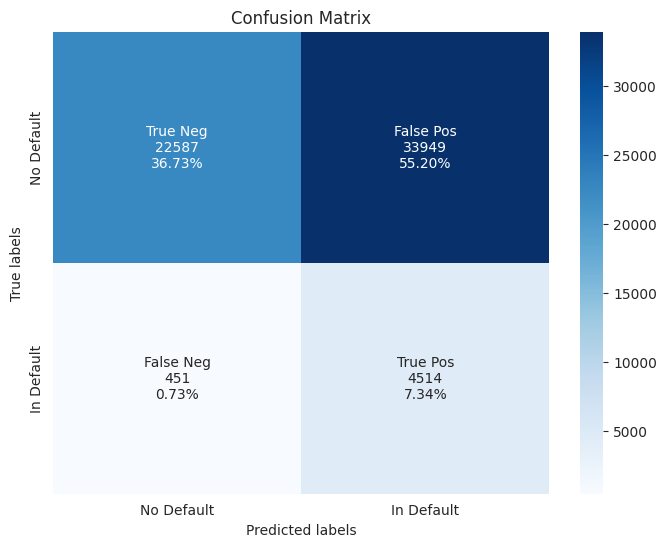

In [171]:
#Matrice de confusion
cm = confusion_matrix(y_test, np.argmax(y_pred_over,axis = 1))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Seuil optimal pour la courbe ROC

In [172]:
y_pred_1 = y_pred_over[:, 1] # Probability of defaul (In Default)

In [173]:
# treshhold pour donner ou refuser le credit
#aximizing this difference means you're looking for the threshold
#where the model is good at identifying defaults while keeping false positives to a minimum.

# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.738175


In [174]:
# def credit_decision (customers_data):

#         customers_data = X_test.copy()

#         pred_probs = y_pred_over[:, 1]

#         customer_probabilities = pd.DataFrame({
#             'Customer ID': customers_data.index,  # Assuming the index is a customer ID or similar
#             'Probability of Default': pred_probs
#         })

#         threshold = 0.725

#         # Appliquer le meilleur seuil pour classer les candidats
#         credit_decision = (y_pred_1 > best_thresh).astype(int)

#         print(customer_probabilities.head())

In [175]:
credit_decision(X_test, best_lgbm_over , 0.725)

Customer ID  Probability of Default  Credit Decision
0           216689                0.122295                0
1            37196                0.706890                0
2            57170                0.366388                0
3           269993                0.726025                1
4           134505                0.335435                0
...            ...                     ...              ...
61496       248676                0.299920                0
61497       221907                0.780780                1
61498       195437                0.226143                0
61499       271682                0.870021                1
61500       283531                0.292932                0

[61501 rows x 3 columns]

In [176]:
# Failing for some reason investigate
# # Plot the distribution of probabilities
# plt.figure(figsize=(8,6))
# plt.hist(pred_probs, bins=20, edgecolor='k', alpha=0.7)
# plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
# plt.title('Distribution of Credit Approval Probabilities')
# plt.xlabel('Probability of Default')
# plt.ylabel('Number of Customers')
# plt.legend()
# plt.show()

Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

In [179]:
!pip install dash
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.4 MB/s eta 0:00:00


In [180]:
# ngrok.kill()

NameError: name 'ngrok' is not defined

In [181]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import dash_table
from dash.dependencies import Input, Output
import plotly.graph_objects as go  # Use this for graphing
import pandas as pd
import numpy as np
from pyngrok import ngrok

ngrok.set_auth_token('2b7l30licIJYUgJd5xJhKape9DW_7Cs7n75VwT5g7L5g4boDw')  # Replace with your token

# Connect ngrok to the Dash app port (usually 8050)
public_url = ngrok.connect(8050)  # Dash default port
print("Dash app running at:", public_url)

# Initialize Dash app
app = dash.Dash(__name__)

# Sample customer data (replace with your actual data)
customers_data = X_test.copy()  # Replace X_test with your actual test data

# Function to make credit decisions
def credit_decision(customers_data, model, threshold=0.725):
    y_pred_over = model.predict_proba(customers_data)  # Predict probabilities
    pred_probs = y_pred_over[:, 1]  # Probability of default for the positive class

    # Create a DataFrame for customer probabilities
    customer_probabilities = pd.DataFrame({
        'Customer ID': customers_data.index,  # Assuming the index is a customer ID or similar
        'Probability of Default': pred_probs
    })

    # Apply the threshold for classification
    customer_probabilities['Credit Decision'] = (pred_probs > threshold).astype(int)
    customer_probabilities['Credit Decision'] = customer_probabilities['Credit Decision'].apply(lambda x: "Approved" if x == 0 else "Refused")

    return customer_probabilities

# Replace `best_lgbm_smote` and `best_lgbm_over` with your actual models
model_smote = best_lgbm_smote
model_over = best_lgbm_over

# Get predictions for both models
customer_probabilities_smote = credit_decision(customers_data, model_smote)
customer_probabilities_over = credit_decision(customers_data, model_over)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Credit Approval Probability Dashboard"),

    # Dropdown for threshold control
    dcc.Slider(
        id='threshold-slider',
        min=0,
        max=1,
        step=0.01,
        value=0.725,
        marks={i/10: f'{i/10}' for i in range(11)},
        tooltip={"placement": "bottom", "always_visible": True},
    ),

    # Graph to show the distribution of probabilities for both models
    dcc.Graph(id='probability-distribution'),

    # Table to show the customer decisions based on selected threshold
    dash_table.DataTable(
        id='customer-table',
        columns=[
            {'name': 'Customer ID', 'id': 'Customer ID'},
            {'name': 'Probability of Default', 'id': 'Probability of Default'},
            {'name': 'Credit Decision', 'id': 'Credit Decision'}
        ],
        style_table={'height': '400px', 'overflowY': 'auto'},
        style_cell={'textAlign': 'center'},
    ),

    # Display the selected threshold value
    html.H3(id='threshold-value', children=f"Selected Threshold: 0.725")
])

# Callback to update graph and customer table based on threshold
@app.callback(
    [Output('probability-distribution', 'figure'),
     Output('threshold-value', 'children'),
     Output('customer-table', 'data')],
    [Input('threshold-slider', 'value')]
)
def update_dashboard(threshold):
    # Classify credit decisions based on threshold for both models
    customer_probabilities_smote = credit_decision(customers_data, model_smote, threshold)
    customer_probabilities_over = credit_decision(customers_data, model_over, threshold)

    # Plot the probability distribution for both models in one figure
    fig = go.Figure()

    # Add SMOTE model distribution
    fig.add_trace(go.Histogram(
        x=customer_probabilities_smote['Probability of Default'],
        nbinsx=20,
        name="Model 1 (SMOTE)",
        opacity=0.6
    ))

    # Add Over-sampling model distribution
    fig.add_trace(go.Histogram(
        x=customer_probabilities_over['Probability of Default'],
        nbinsx=20,
        name="Model 2 (Over-sampling)",
        opacity=0.6
    ))

    # Update layout for better clarity
    fig.update_layout(
        title=f"Probability Distribution (Threshold = {threshold})",
        xaxis_title='Probability of Default',
        yaxis_title='Count',
        barmode='overlay'
    )

    # Display the threshold value
    threshold_value_display = f"Selected Threshold: {threshold}"

    # Return the updated table data (based on both models' probabilities)
    table_data = customer_probabilities_smote.to_dict('records')  # Convert to dict for Dash DataTable
    return fig, threshold_value_display, table_data

# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline', port=8050, debug=True)


Dash app running at: NgrokTunnel: "https://6f24-35-232-46-8.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>

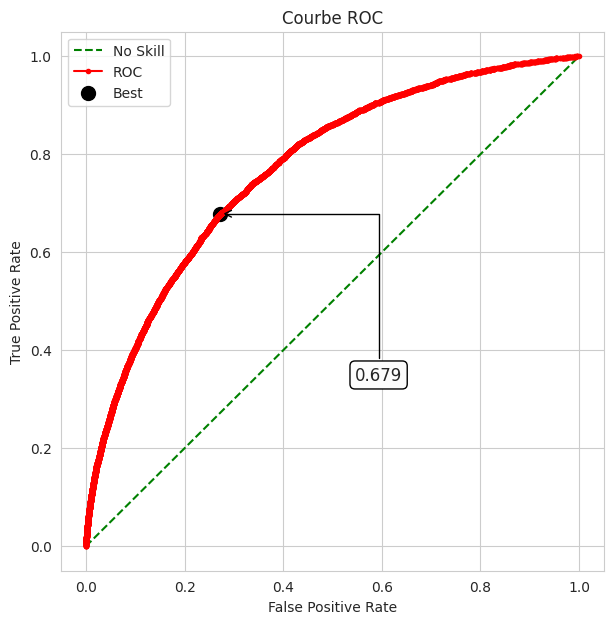

In [182]:
# Evauation of the model performance for best threshold
plt.figure(figsize=(7,7))

# graphique roc curve du modèle
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.title('Courbe ROC')
annot_auc(fpr[ix],tpr[ix])
# Afficher le graphique
plt.show()

Matrice de confusion

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

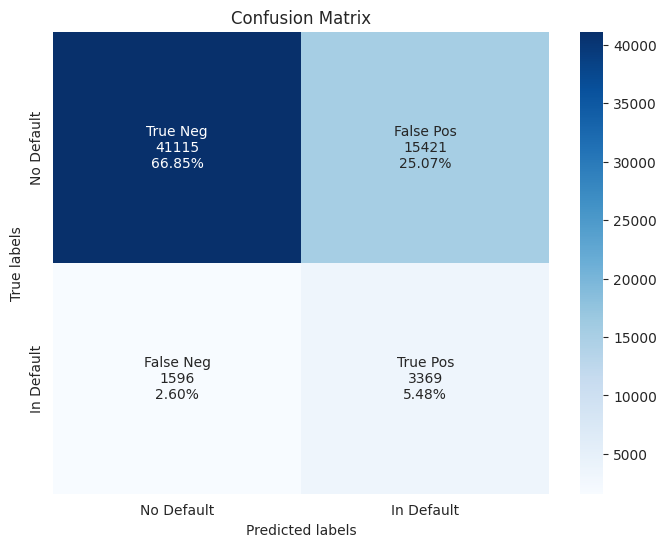

In [183]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [184]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56536
           1       0.18      0.68      0.28      4965

    accuracy                           0.72     61501
   macro avg       0.57      0.70      0.56     61501
weighted avg       0.90      0.72      0.78     61501



In [185]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_roc)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_roc)))

LightGBM RandomizedSearchCV Model precision score: 0.1793
LightGBM RandomizedSearchCV Model recall score: 0.6785
LightGBM RandomizedSearchCV Model accuracy score: 0.7233
LightGBM RandomizedSearchCV Model F1 score: 0.2836


**Seuil optimal pour la courbe de rappel / précision**

In [186]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)

Evaluer chaque seuil

In [187]:
# Calculate F-score safely by handling zero precision or recall
fscore = np.zeros_like(precision)  # Initialize fscore as an array of zeros
for i in range(len(precision)):
    if precision[i] > 0 and recall[i] > 0:  # Avoid division by zero
        fscore[i] = (2 * precision[i] * recall[i]) / (precision[i] + recall[i])
    else:
        fscore[i] = 0  # Set F-score to 0 if precision or recall is 0

# Locate the index of the largest F-score
ix = np.argmax(fscore)

# Print the best threshold and F-score
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))


Best Threshold=0.857004, F-Score=0.319


invalid value encountered in true_divide

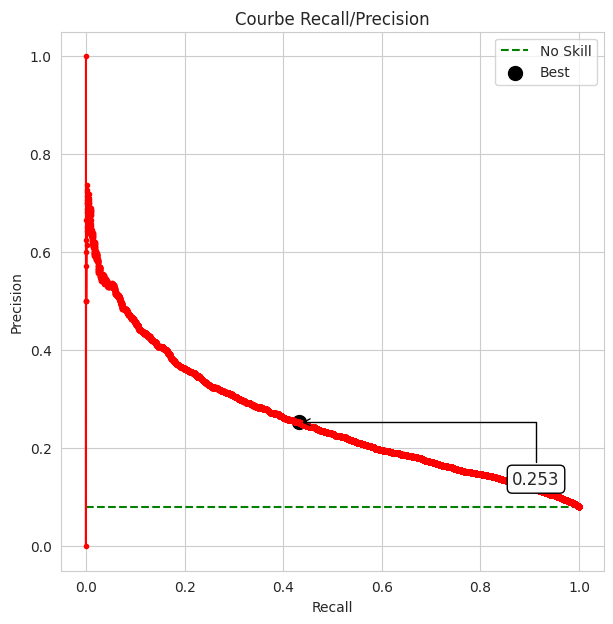

In [188]:
# plot the roc curve for the model
plt.figure(figsize=(7,7))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.title('Courbe Recall/Precision')
annot_auc(recall[ix],precision[ix])
# show the plot
plt.show()

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [189]:
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

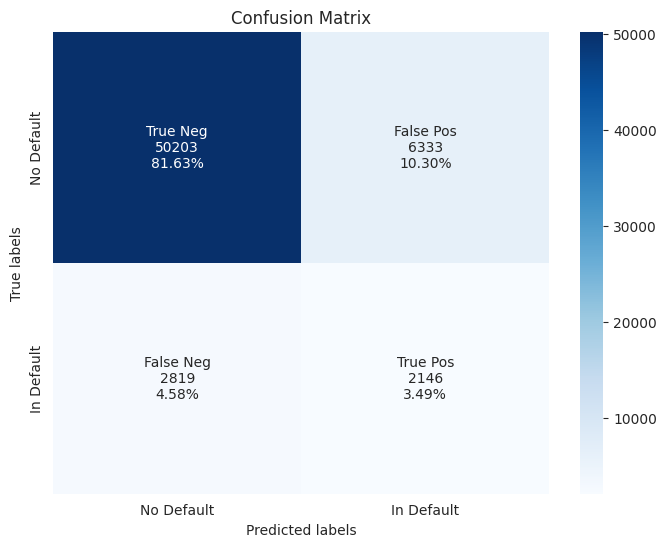

In [190]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [193]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     56536
           1       0.25      0.43      0.32      4965

    accuracy                           0.85     61501
   macro avg       0.60      0.66      0.62     61501
weighted avg       0.89      0.85      0.87     61501



Afficher les scores

In [194]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_precision_recall)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_precision_recall)))

LightGBM RandomizedSearchCV Model precision score: 0.2531
LightGBM RandomizedSearchCV Model recall score: 0.4322
LightGBM RandomizedSearchCV Model accuracy score: 0.8512
LightGBM RandomizedSearchCV Model F1 score: 0.3193


**Seuil métier**

Graphique avec le seuil métier

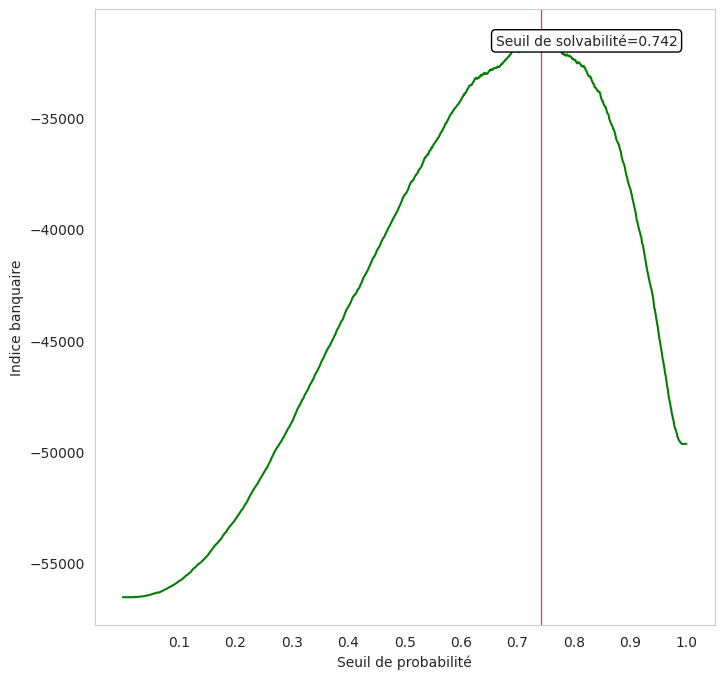

In [195]:
gain_seuil(y_pred_1, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     56536
           1       0.18      0.66      0.29      4965

    accuracy                           0.74     61501
   macro avg       0.57      0.70      0.56     61501
weighted avg       0.90      0.74      0.79     61501



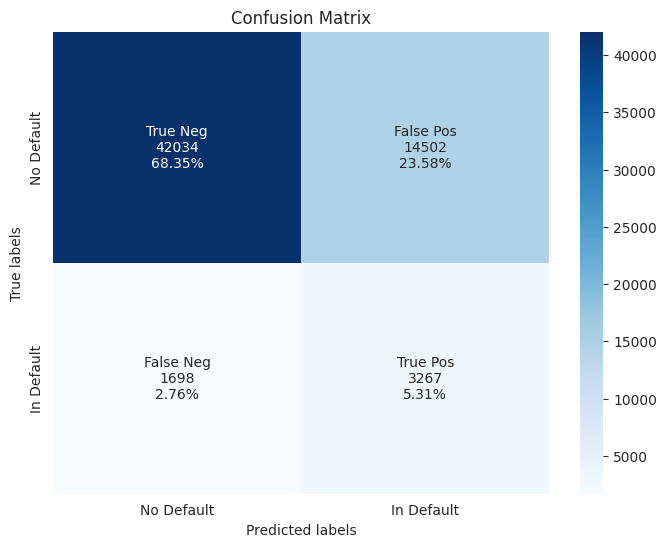

In [196]:
# Définition d'un seuil de classification
threshold = 0.750
pred_metier = (y_pred_over[:,1] > threshold).astype(int)

cm = confusion_matrix(y_test, pred_metier)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

print('Classification Report')
print(classification_report(y_test, pred_metier))

In [197]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, pred_metier)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, pred_metier)))

LightGBM RandomizedSearchCV Model precision score: 0.1839
LightGBM RandomizedSearchCV Model recall score: 0.6580
LightGBM RandomizedSearchCV Model accuracy score: 0.7366
LightGBM RandomizedSearchCV Model ROCAUC score: 0.7007
LightGBM RandomizedSearchCV Model F1 score: 0.2874


Afficher les parametes les plus importantes :

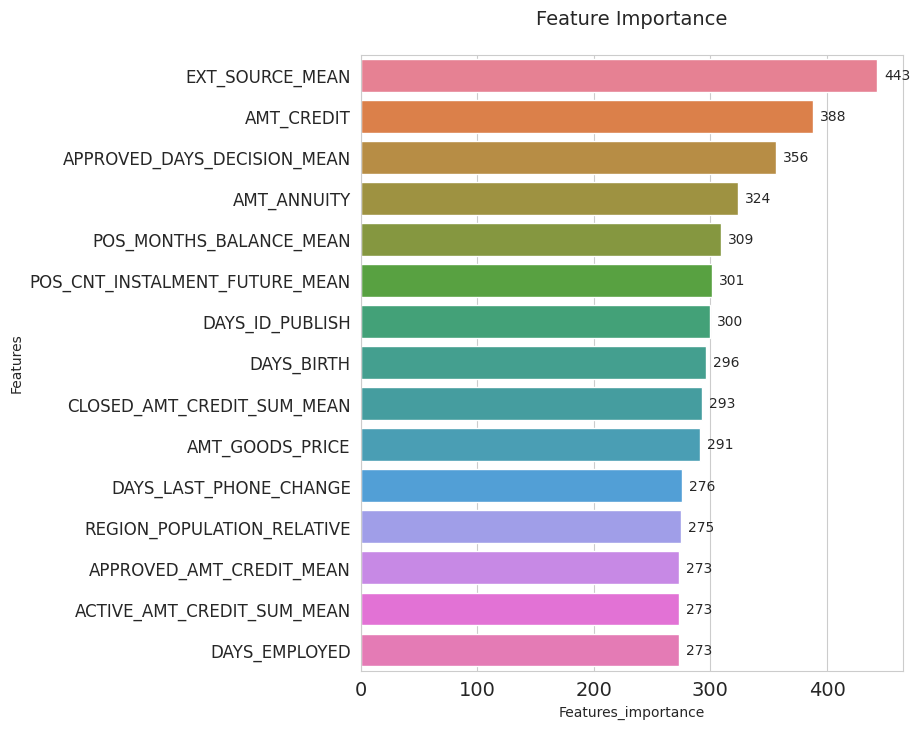

In [198]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':best_lgbm_over['lgbm'].feature_importances_
              })

df_feature_importance_15 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(15)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_15, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Feature Importance\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()


## RandomForest

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rlf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [201]:
rlf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [202]:
from sklearn import metrics

y_pred = rlf_clf.predict(X_test)
print("Accuracy of Random Forest Classifier is:", metrics.accuracy_score(y_pred, y_test))

Accuracy of Random Forest Classifier is: 0.9193183850669094


In [203]:
rlf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [204]:
!pip install mlflow dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.2/252.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9/208.9 kB 13.0 MB/s eta 0:00:00


## Naive Bayes classifier

In [205]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print("Accuracy of Naive Bayes Classifier is:", metrics.accuracy_score(y_pred, y_test))

Accuracy of Naive Bayes Classifier is: 0.20250077234516511


## DecisionTreeClassifier

In [206]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print("Accuracy of Decision Tree Classifier is:", metrics.accuracy_score(y_pred, y_test))

Accuracy of Decision Tree Classifier is: 0.8582462073787418


In [207]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

## KNeighbors

In [208]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(weights='distance', n_neighbors=5)
kn_clf.fit(X_train, y_train)
y_pred = kn_clf.predict(X_test)
print("Accuracy of KNeighbors Classifier is:", metrics.accuracy_score(y_pred, y_test))

Accuracy of KNeighbors Classifier is: 0.9142452968244419


In [209]:
kn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [210]:
# Precision, Recall, F1-score (better for class imbalance).
# ROC-AUC (useful for imbalanced datasets as it considers class probabilities)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56536
           1       0.18      0.02      0.03      4965

    accuracy                           0.91     61501
   macro avg       0.55      0.51      0.49     61501
weighted avg       0.86      0.91      0.88     61501



In [211]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

kn_clf.fit(X_resampled, y_resampled)
y_pred = kn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[40534 16002]
 [ 3233  1732]]


In [212]:
kn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     56536
           1       0.10      0.35      0.15      4965

    accuracy                           0.69     61501
   macro avg       0.51      0.53      0.48     61501
weighted avg       0.86      0.69      0.76     61501



In [214]:
from sklearn.metrics import roc_auc_score

y_prob = kn_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.5488128303245116


In [215]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6872408578722298


## XGBClassifier


In [216]:
model = XGBClassifier(tree_method = 'exact')

ML FLOW

In [217]:
# infer signature with params
signature = infer_signature(X_train, y_train)

# Tracking experiments with MLFLOW

In [219]:
import mlflow
from mlflow.models import infer_signature
import dagshub
from dagshub.notebook import save_notebook

save_notebook(
    repo="Pipalipa/my-first-repo",  # Your
    branch="mlflow-101"                  #  branch
)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=3e2813ab-c8b5-4530-b298-1b5eedf6f56b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=a9401b306bdff6501cfb283fde3283d7c893a62a167df4b4327b8c326611f909




Accessing as Pipalipa

Uploading files (1) to "Pipalipa/my-first-repo"...

Upload finished successfully!

In [220]:
#@markdown Enter the username of your DAGsHub account:
DAGSHUB_USER_NAME = "Pipalipa" #@param {type:"string"}

#@markdown Enter the email for your DAGsHub account:
DAGSHUB_EMAIL = "pipscorreia@gmail.com" #@param {type:"string"}

In [221]:
#@markdown DagsHub repo name to migrate and/or clone
DAGSHUB_REPO_NAME = "MLFLOw_Model" #@param {type:"string"}

#@markdown Name of branch to migrate and/or clone
BRANCH = "mlflow-101" #@param {type:"string"}

#@markdown Do you want to start fresh from the canonical repo for this webinar? If you already have a DagsHub repo for this webinar, you must uncheck this box. Additionally, you should change the branch to `mlflow-101`, to match what is in your repo.
START_FRESH = False #@param {type:"boolean"}

In [ ]:
# mlflow.end_run()

In [222]:
import dagshub
import mlflow

# Initialize DagsHub integration
dagshub.init("my-first-repo", "Pipalipa", mlflow=True)

# Set MLflow tracking URI to point to DagsHub
mlflow.set_tracking_uri("https://dagshub.com/Pipalipa/my-first-repo.mlflow")

# Define parameters and metrics for multiple models
models = [
    {"name": "LightGBM_smote", "params": {"n_estimators": 800}, "metrics": {"accuracy": 0.7408}},
    {"name": "LightGBM_oversampling", "params": {"n_estimators": 1000}, "metrics": {"accuracy": 0.7051193727227998}},
    {"name": "RandomForest_balanced", "params": {"n_estimators": 100}, "metrics": {"accuracy": 0.9193183850669094}},
    {"name": "DecisionTree_balanced", "params": {'class_weight': 'balanced'}, "metrics": {"accuracy": 0.85824620737874184}},
    {"name": "KNeighbors", "params": {'weights': 'distance'}, "metrics": {"accuracy": 0.9142452968244419}},
    {"name": "KNeighbors_smote", "params": {'weights': 'distance'}, "metrics": {"accuracy": 0.6876798751239818}},
]

# Log parameters and metrics for each model
for model in models:
    with mlflow.start_run(run_name=model["name"]):  # Start a run for each model
        print(f"Logging data for model: {model['name']}")

        # Log parameters
        if "params" in model:
            for param_name, param_value in model["params"].items():
                mlflow.log_param(param_name, param_value)
                print(f"Logged param: {param_name} = {param_value}")

        # Log metrics
        if "metrics" in model:
            for metric_name, metric_value in model["metrics"].items():
                mlflow.log_metric(metric_name, metric_value)
                print(f"Logged metric: {metric_name} = {metric_value}")

        print(f"Data logged for model: {model['name']}")

print("All data logged successfully.")


Initialized MLflow to track repo "Pipalipa/my-first-repo"

Repository Pipalipa/my-first-repo initialized!

Logging data for model: LightGBM_smote
Logged param: n_estimators = 800
Logged metric: accuracy = 0.7408
Data logged for model: LightGBM_smote
🏃 View run LightGBM_smote at: https://dagshub.com/Pipalipa/my-first-repo.mlflow/#/experiments/0/runs/2e82471c8cac4b53a59b96ea98bb4f12
🧪 View experiment at: https://dagshub.com/Pipalipa/my-first-repo.mlflow/#/experiments/0
Logging data for model: LightGBM_oversampling
Logged param: n_estimators = 1000
Logged metric: accuracy = 0.7051193727227998
Data logged for model: LightGBM_oversampling
🏃 View run LightGBM_oversampling at: https://dagshub.com/Pipalipa/my-first-repo.mlflow/#/experiments/0/runs/dbcde6d0e2ba47f39c0cc2e5344923b3
🧪 View experiment at: https://dagshub.com/Pipalipa/my-first-repo.mlflow/#/experiments/0
Logging data for model: RandomForest_balanced
Logged param: n_estimators = 100
Logged metric: accuracy = 0.9193183850669094
Data logged for model: RandomForest_balanced
🏃 View run RandomForest_balanced at: https://dagshub.com/Pipalipa/m

In [ ]:
# ! pip install dagshub

In [ ]:
# !zip -r /content /content

In [ ]:
# pip install cupy

In [ ]:
# import session_info
# session_info.show()

In [ ]:
# # test case evidently
# reference = housing_data.sample(n=5000, replace=False)
# current = housing_data.sample(n=5000, replace=False)

In [ ]:
# Dashboard
# test case
# report = Report(metrics=[
#     DataDriftPreset(),
# ])

# report.run(reference_data=reference, current_data=current)
# report

In [ ]:
# test case
# report = Report(metrics=[
#     ColumnSummaryMetric(column_name='AveRooms'),
#     ColumnQuantileMetric(column_name='AveRooms', quantile=0.25),
#     ColumnDriftMetric(column_name='AveRooms'),

# ])

# report.run(reference_data=reference, current_data=current)
# report

In [ ]:
# test case
# report = Report(metrics=[
#     generate_column_metrics(ColumnQuantileMetric, parameters={'quantile':0.25}, columns=['AveRooms', 'AveBedrms']),
# ])

# report.run(reference_data=reference, current_data=current)
# report

In [ ]:
# test case
# report = Report(metrics=[
#     ColumnSummaryMetric(column_name='AveRooms'),
#     generate_column_metrics(ColumnQuantileMetric, parameters={'quantile':0.25}, columns='num'),
#     DataDriftPreset()
# ])

# report.run(reference_data=reference, current_data=current)
# report

In [ ]:
#test case
# report.as_dict()

In [ ]:
# test case
# tests = TestSuite(tests=[
#     TestNumberOfColumnsWithMissingValues(),
#     TestNumberOfRowsWithMissingValues(),
#     TestNumberOfConstantColumns(),
#     TestNumberOfDuplicatedRows(),
#     TestNumberOfDuplicatedColumns(),
#     TestColumnsType(),
#     TestNumberOfDriftedColumns(),
# ])

# tests.run(reference_data=reference, current_data=current)
# tests

In [ ]:
#test case
# suite = TestSuite(tests=[
#     NoTargetPerformanceTestPreset(),
# ])

# suite.run(reference_data=reference, current_data=current)
# suite

In [ ]:
#test case
# suite = TestSuite(tests=[
#     TestColumnDrift('Population'),
#     TestMeanInNSigmas('HouseAge'),
#     NoTargetPerformanceTestPreset(columns=['AveRooms', 'AveBedrms', 'AveOccup'])
# ])

# suite.run(reference_data=reference, current_data=current)
# suite

In [ ]:
#test case
# suite = TestSuite(tests=[
#     TestNumberOfColumnsWithMissingValues(),
#     TestNumberOfRowsWithMissingValues(),
#     TestNumberOfConstantColumns(),
#     TestNumberOfDuplicatedRows(),
#     TestNumberOfDuplicatedColumns(),
#     TestColumnsType(),
#     TestNumberOfDriftedColumns(),
#     TestColumnDrift('Population'),
#     TestShareOfOutRangeValues('Population'),
#     DataStabilityTestPreset(),
#     RegressionTestPreset()

# ])

# suite.run(reference_data=reference, current_data=current)
# suite

In [ ]:
# #test case
# suite.as_dict()